In [32]:
# import import_ipynb
# %run data_analysis_function.ipynb


# pd.datetime(df.column, unit ='ms')

# RWWIHOBG9_V0	AEWIGHG9__P0	AEWIGHG9__T0	AEWIHO_T9AV2

In [2]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [3]:
# import data_analysis_function
a=None

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [ ]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [5]:
import json
#import collections
import os
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

from dataset_analysis import read_dataframe, create_dateTime, create_month
from dataset_analysis import choose_month, drop_month_year, ascending_dataframe, rearrange_dataframe
from dataset_analysis import check_blast_furnace, check_target_column, dataframe_reset_index
from dataset_analysis import drop_nan_value, drop_unique_valued_columns, drop_string_column, dataframe_datetime
from dataset_analysis import free_dataframe_from_outlier, free_target_column_from_outlier, gaussian_curve, draw_gaussian_curve

#from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import score_checking_with_cross_validation
# from dataset_analysis import dataframe_date_time_type
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

from model_file import make_dataset, scikit_learn_model
from model_file import plot_graph, evaluation_metrices
from model_file import NN_model
from model_file import make_dataset_LSTM, split_sequence, LSTM_model, plot_history, vanilla_lstm
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

from dataset_analysis import test_stationarity, tsplot_dataset, tsplot
from model_file import make_dataset_arima, StartARIMAForecasting

In [6]:
# from model_file import make_dataset, scikit_learn_model
# from model_file import plot_graph, evaluation_metrices
# from model_file import NN_model
# from model_file import make_dataset_LSTM, split_sequence, LSTM_model

In [7]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
feb_march_file = config['DEFAULT']['feb_march_file']

filepath_server_feb_march = config['DEFAULT']['file_path_server_feb_march']
filepath_server_april_may = config['DEFAULT']['file_path_server_april_may']
filepath_server_june_july = config['DEFAULT']['file_path_server_june_july']

filepath_ubuntu_feb_march = config['DEFAULT']['file_ubuntu_feb_march']
filepath_ubuntu_april_may = config['DEFAULT']['file_ubuntu_april_may']
filepath_ubuntu_june_july = config['DEFAULT']['file_ubuntu_june_july']

filepath_windows_feb_march = config['DEFAULT']['file_windows_feb_march']
filepath_windows_april_may = config['DEFAULT']['file_windows_april_may']
filepath_windows_june_july = config['DEFAULT']['file_windows_june_july']


start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
required_number_of_test_data = config['DEFAULT']['required_number_of_test_data']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
number_of_step_lstm = config['DEFAULT']['n_steps_lstm']
epochs = config['DEFAULT']['epochs']
batch_size = config['DEFAULT']['batch_size']

In [8]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder_1'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(' has already created',final_directory)
    pass

from datetime import date
today = date.today()
print("Today's date:", today)

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction
 has already created /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/image_folder_1
Today's date: 2019-11-21


In [9]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('new metrics file creates')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('old metrics file removed and a new one is created')

old metrics file removed and a new one is created


In [7]:
# # import pandas as pd
# # count = 0
# # for data in pd.read_csv(filepath_server,encoding = 'ISO-8859-1',chunksize  = 1000):
# #     count += 1                          # counting the number of chunks
# #     lastlen = len(data)                 # finding the length of last chunk
# # datalength = (count*1000 + lastlen - 1000) # length of total file

# import multiprocessing as mp
# print("Number of processors: ", mp.cpu_count())

In [10]:
dataframe_read = read_dataframe(filepath_ubuntu)

In [11]:
print(dataframe_read.shape)

(186100, 4239)


In [12]:
dataframe_read.head(2)

,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOUT10V1,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0
0,1565853000000,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,...,0,71.894489,50.087283,40.250768,73.763059,71.201763,49.606024,38.096640,0.671974,33.111827
1,1565852940000,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,...,0,71.902377,50.110508,40.379436,73.763059,71.276868,49.615189,38.034993,0.672205,33.060837


In [ ]:
# temp_frame = initial_dataframe.iloc[-45128:,:]
# temp_frame = initial_dataframe.iloc[-85349:-45128,:]
# temp_frame = initial_dataframe.iloc[-165519:-85349,:]

In [ ]:
# temp_frame.to_csv('june_july_1.csv')

In [ ]:
# read = create_dataframe('june_july_1.csv')

In [ ]:
# read.columns.get_loc('Unnamed: 0')

In [ ]:
# read_1 = read.drop(read.columns[0], axis=1)

In [13]:
cols_list = ['longTime',furnace_signal_column_a,furnace_signal_column_b,target_column,'RWWIHOBG9_V0','AEWIGHG9__P0','AEWIGHG9__T0']
dataframe_sliced = dataframe_read.iloc[:][cols_list]

In [14]:
dataframe_with_date = create_dateTime(dataframe_sliced,'row_ID','Unnamed: 0')

In [ ]:
# def distinct_month_1(dataframe, target_column,month_key):
#     array_df = []
#     for i in month_key:
#         req_data_1=dataframe.loc[(dataframe[target_column]==i)]
#         req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
        
#         array_df.append(req_frame_1)
    
#     return array_df

In [ ]:
# def draw_month(month_key_value, dict_of_month,target_column):
#     for i in month_key_value:
#         value = dict_of_month[i]
#         value.iloc[:].plot(y=[target_column])
#         plt.title('visualization of signal ' + str(target_column) + ' in time of ' + str(i))
#         plt.xlabel('range')
#         plt.ylabel('value')

#         plt.rcParams['figure.figsize'] = (5,5)
#         plt.savefig(str(i) + '.jpg')
#         plt.show()

In [15]:
dataframe_include_month, month_array_df = create_month(dataframe_with_date, 'month', target_column) 

In [17]:
dataframe_include_month.head(3)

,DEWIHOAT9_I0,DEWIHOBT9_I0,AEWIHO_T9AV2,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,year,month
dateTime,,,,,,,,
2019-08-15 07:10:00,0.0,100.0,74.720623,76.571320,80.708056,82.832073,2019,8
2019-08-15 07:09:00,0.0,100.0,74.837410,76.680860,80.384023,82.934400,2019,8
2019-08-15 07:08:00,0.0,100.0,75.169542,76.999668,80.432261,83.129933,2019,8


In [21]:
import pandas as pd
def choose_month(dataframe, target_column_month):
    req_data_month = dataframe.loc[(dataframe[target_column_month] == 2) | (dataframe[target_column_month] == 3)
                                   | (dataframe[target_column_month] == 4)| (dataframe[target_column_month] == 5)
                                   | (dataframe[target_column_month] == 6)| (dataframe[target_column_month] == 7)
                                  | (dataframe[target_column_month] == 8)]
    #     req_data_month=dataframe.loc[(dataframe[target_column_month]==2|3) ]
    req_frame_month = pd.DataFrame(req_data_month, columns=dataframe.columns)

    return req_frame_month

In [ ]:
# # for i in specific_month_df['month']:
# #     print(i)

# initial_dataframe = None
# df_1 = None
# date_df = None
# specific_month_df = None
# spec_month = None
# multivariate_data = None
# rearranged_dataframe = None
# dataframe_x = None
# dataframe_y = None
# dataframe_no_zero_value_blast_furnace = None

In [22]:
# import pandas as pd
# def specific_month_df(dataframe,target_column_month):
#     req_data_month=dataframe.loc[(dataframe[target_column_month]==2) | (dataframe[target_column_month]==3) |
#                                  (dataframe[target_column_month]==4)
#                                  | (dataframe[target_column_month]==5) | (dataframe[target_column_month]==6) | (dataframe[target_column_month]==7)
#                                  | (dataframe[target_column_month]==8)]
# #     req_data_month=dataframe.loc[(dataframe[target_column_month]==2|3) ]
#     req_frame_month=pd.DataFrame(req_data_month,columns=dataframe.columns)
    
#     return req_frame_month

dataframe_with_specific_month = choose_month(dataframe_include_month,'month')

In [23]:
# def drop_month_year(dataframe):
# #     dataframe = dataframe.drop(['year','month'], axis=1)
#     dataframe = dataframe.reset_index()
#     return dataframe

# spec_month = drop_month_year(date_df)
dataframe_with_specific_month_reset = drop_month_year(dataframe_with_specific_month) 

In [25]:
# spec_month = spec_month.iloc[:200,:]

dataframe_with_specific_month_reset.head()

,dateTime,DEWIHOAT9_I0,DEWIHOBT9_I0,AEWIHO_T9AV2,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,year,month
0,2019-08-15 07:10:00,0.0,100.0,74.720623,76.571320,80.708056,82.832073,2019,8
1,2019-08-15 07:09:00,0.0,100.0,74.837410,76.680860,80.384023,82.934400,2019,8
2,2019-08-15 07:08:00,0.0,100.0,75.169542,76.999668,80.432261,83.129933,2019,8
3,2019-08-15 07:07:00,0.0,100.0,75.608264,77.494499,80.742173,83.412047,2019,8
4,2019-08-15 07:06:00,0.0,100.0,75.514649,77.376411,81.686501,83.533837,2019,8


In [ ]:
# df_2.columns.get_loc(target_column)
# print(df_2.columns[4142])
# target_df = df_2.loc[:, df_2.columns[4142]]

In [ ]:
# targ = pd.DataFrame(target_df)

In [ ]:
# df_month = pd.DataFrame(index=df_2.index)

In [ ]:
# df_month['year'] = pd.DatetimeIndex(df_month.index).year

In [ ]:
# df_month['month'] = pd.DatetimeIndex(df_month.index).month

In [ ]:
# df_month

In [ ]:
# df_month_final = pd.concat([df_month, target_df], axis=1)
# df_month_final.head()

In [ ]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(186100, 4239)


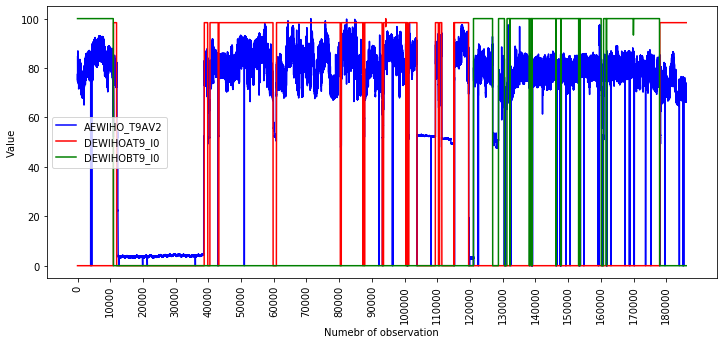

In [27]:
print(dataframe_read.shape)
plt.plot(dataframe_read[target_column], color = 'blue')
plt.plot(dataframe_read[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_read[furnace_signal_column_b], color = 'green')
plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='best')
# plt.xlim(0,dataframe_read.shape[0]+10)
plt.xticks(np.arange(0,dataframe_read.shape[0],10000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('blast_vs_target_pre.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12,5)

In [28]:
dataframe_ascending = ascending_dataframe(dataframe_with_specific_month_reset, start_pos,dataframe_with_specific_month_reset.shape[0]) 

In [30]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]


dataframe_rearranged = rearrange_dataframe(dataframe_ascending,req_column_name,index_array)

# Before cleaning any column draw target vs month

In [67]:
import collections
def draw_target_vs_month(dataframe, month_key_value, dict_of_month, target_column):
    for i in month_key_value:
#         print('i: ',i)
        value = dict_of_month[i]
#         print('value: ',type(value))
#         print(value.head(1))
        value.iloc[:].plot(x = value.columns[0],y=[target_column])
        plt.title('visualization of signal ' + str(target_column) + ' in time of ' + str(i))
        plt.xlim(value[value.columns[0]].min(), value[value.columns[0]].max())
        plt.xlabel('range')
        plt.ylabel('value')

        plt.rcParams['figure.figsize'] = (12, 5)
        plt.savefig(final_directory+ '/'+str(i) + '.jpg')
        plt.show()
    

def month_collection(dataframe, target_column):
    dict_of_month = {k: v for k, v in dataframe.groupby('month')}
    month_key_value = collections.OrderedDict(dict_of_month)
    draw_month_fig = draw_target_vs_month(dataframe,month_key_value, dict_of_month, target_column)

i:  2


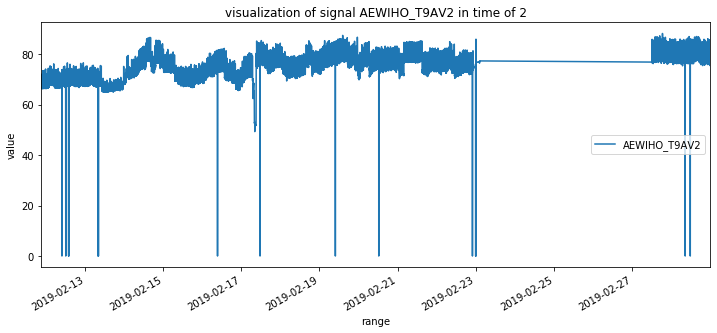

i:  3


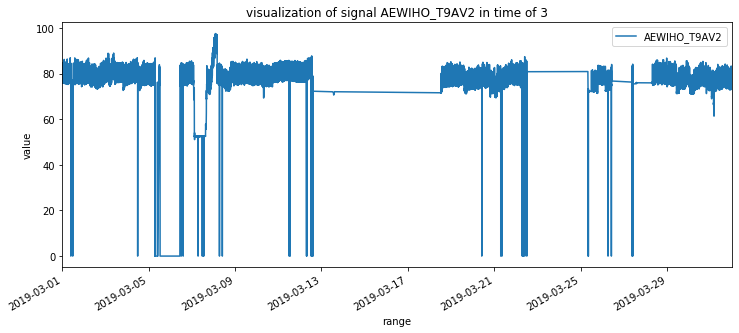

i:  4


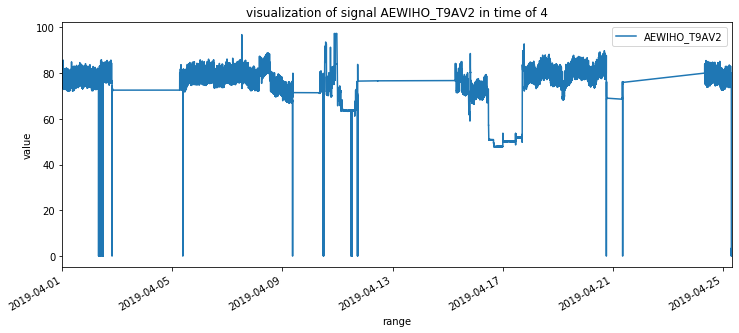

i:  5


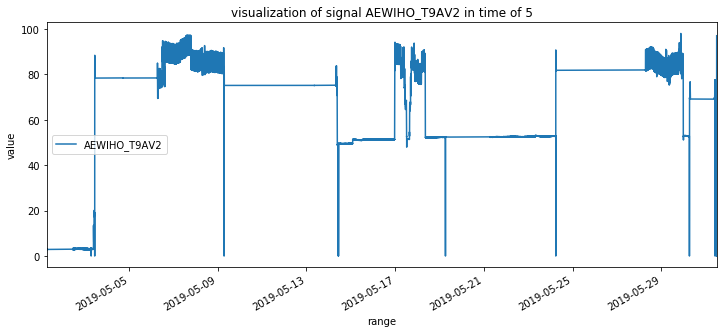

i:  6


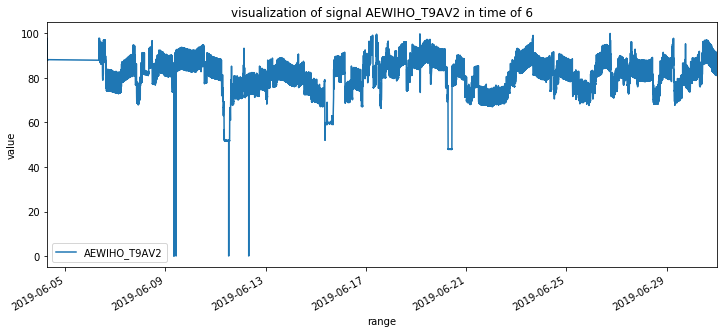

i:  7


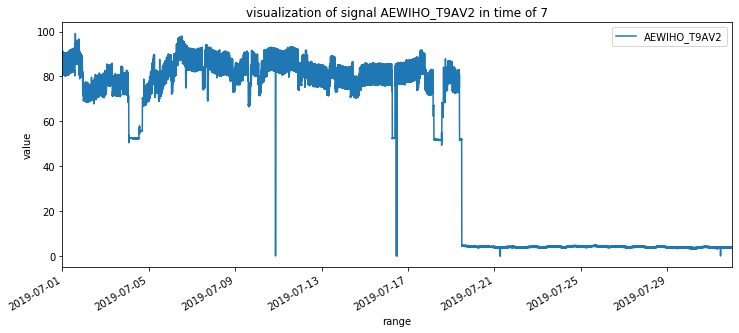

i:  8


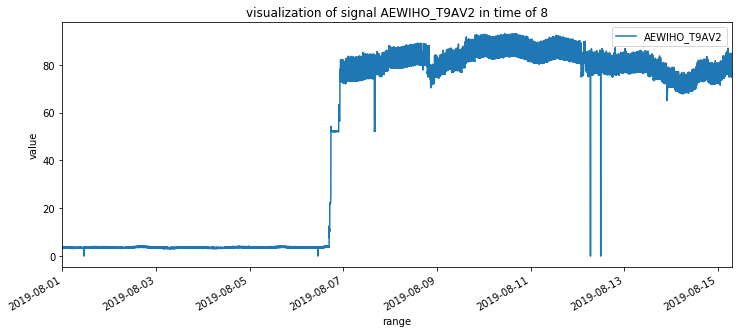

In [68]:
draw_target_month = month_collection(dataframe_rearranged, target_column)

In [56]:
dataframe_rearranged[dataframe_rearranged.columns[0]].max()

Timestamp('2019-08-15 07:10:00')

In [21]:
dataframe_clean_furnace_column = check_blast_furnace(dataframe_rearranged, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

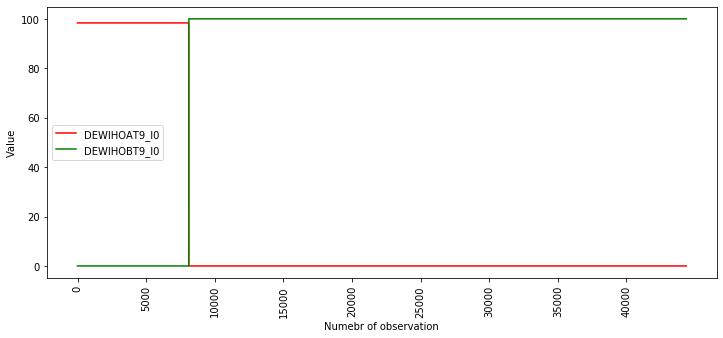

(44355, 9)


In [22]:
plt.plot(dataframe_clean_furnace_column[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_clean_furnace_column[furnace_signal_column_b],'green')
plt.legend([furnace_signal_column_a, furnace_signal_column_b], loc='center left')
#plt.xlim(0,dataframe_clean_furnace_column.shape[0]+1000)
plt.xticks(np.arange(0,dataframe_clean_furnace_column.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
#plt.savefig('furnace_column.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12, 5)
plt.show()

print(dataframe_clean_furnace_column.shape)

In [ ]:
# dataframe_x = dataframe_no_zero_value_blast_furnace.reset_index()
# dataframe_y = dataframe_x.drop(['index'], axis=1)

In [ ]:
# print(dataframe_y.shape)
# plt.plot(dataframe_y[target_column], color = 'blue')
# plt.plot(dataframe_y[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_y[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='best')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,dataframe_y.shape[0],5000),rotation='vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# plt.savefig('blast_vs_target_vanish_furnace_zero.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12,5)

In [ ]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1.dtypes

In [ ]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [ ]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [23]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

# dataframe_no_zero_value_target_column = None

In [24]:
# import pandas as pd
# def no_zero_value_in_target_11(dataframe, target_column, req_drop_value_target):
# #     req_data_1=dataframe.loc[(dataframe[target_column]!=req_drop_value_target)]
# #     req_data_1 = dataframe.loc[(dataframe[target_column]>=60)]
#     req_data_1 = dataframe.loc[(dataframe[target_column]>=60) & (dataframe[target_column]<=90)]
#     req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
    
#     return req_frame_1

# data_target_new_condition = no_zero_value_in_target_11(dataframe_no_zero_value_blast_furnace,target_column,60)
# print(data_target_new_condition.shape)
# data_target_new_condition.dtypes

In [25]:
# # dataframe_no_zero_value_target_column_2 = dataframe_reset_index(dataframe_no_zero_value_target_column)
# dataframe_no_zero_value_target_column_2 = dataframe_reset_index(data_target_new_condition)
# print(dataframe_no_zero_value_target_column_2.shape)

In [26]:
# plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='center left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,dataframe_no_zero_value_target_column_2.shape[0],5000),rotation='vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.savefig('blast_vs_target_post.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [ ]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [27]:
# Drop the ROW which has NAN value

dataframe_drop_nan = drop_nan_value(dataframe_clean_furnace_column)
dataframe_drop_unique_valued_column = drop_unique_valued_columns(dataframe_drop_nan)
dataframe_drop_string = drop_string_column(dataframe_drop_unique_valued_column)
print(dataframe_drop_string.shape)
dataframe_drop_string.dtypes

(44355, 8)


dateTime        datetime64[ns]
DEWIHOAT9_I0           float64
DEWIHOBT9_I0           float64
month                    int64
RWWIHOBG9_V0           float64
AEWIGHG9__P0           float64
AEWIGHG9__T0           float64
AEWIHO_T9AV2           float64
dtype: object

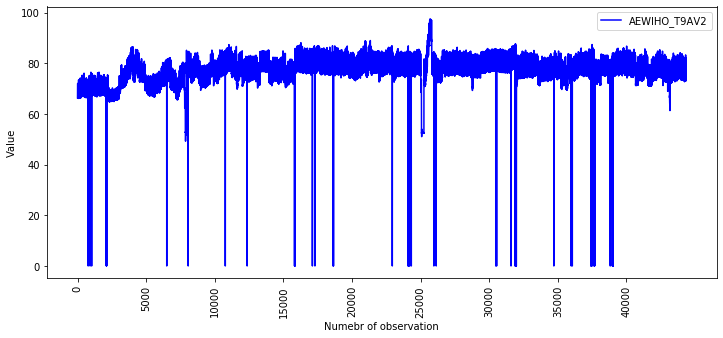

In [28]:
plt.plot(dataframe_drop_string[target_column], color = 'blue')
# plt.plot(dataframe_no_string[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_string[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_drop_string.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
plt.savefig('final_target_column_before_removing_outlier.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
# cols_to_drop = nunique[nunique == 1].index
# dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [29]:
# dataframe_drop_column_with_same_value = drop_unique_valued_columns(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [ ]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [30]:
# Drop the column who has 'objet' type value
# dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [31]:
# dataframe_no_string.dtypes

In [29]:
# initial_dataframe = None
# date_df = None
# specific_month_df = None
# spec_month = None
# rearranged_dataframe = None
# multivariate_data = None
# dataframe_no_zero_value_blast_furnace = None
# dataframe_no_zero_value_target_column = None
# multivariate_data_drop_nan = None
# dataframe_drop_column_with_same_value = None

In [ ]:
# dataframe_drop_row_consecutive_same_value = drop_row(dataframe_no_string)

In [33]:
# print(dataframe_no_string.shape)

# plt.plot(dataframe_no_string[target_column], color = 'blue')
# # plt.plot(dataframe_no_string[furnace_signal_column_a], color = 'red')
# # plt.plot(dataframe_no_string[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.legend([target_column], loc='best')
# plt.xticks(np.arange(0,dataframe_no_string.shape[0],1000),rotation='vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.savefig('final_target_column.png',bbox_inches='tight')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (12, 5)

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [ ]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [34]:
dataframe_drop_string.dtypes

dateTime        datetime64[ns]
DEWIHOAT9_I0           float64
DEWIHOBT9_I0           float64
month                    int64
RWWIHOBG9_V0           float64
AEWIGHG9__P0           float64
AEWIGHG9__T0           float64
AEWIHO_T9AV2           float64
dtype: object

In [35]:
# Make dataframe with dateTime index


dataframe_datetime = dataframe_datetime(dataframe_drop_string) # make dateTime as index
print(dataframe_datetime.shape)

(44355, 7)


In [36]:
dataframe_datetime.shape

(44355, 7)

# drop outlier from whole dataframe/specific column of dataframe

In [39]:
# function to remove outlier from a single column
dataframe_target_column_free_from_outlier = free_target_column_from_outlier(dataframe_datetime, target_column)


print(dataframe_target_column_free_from_outlier.shape)
#plt.plot(dataframe_target_column_free_from_outlier[target_column])
# dataframe_target_column_free_from_outlier.describe()
# print(dataframe_target_column_free_from_outlier.max())

(43953, 7)


(43953, 8)


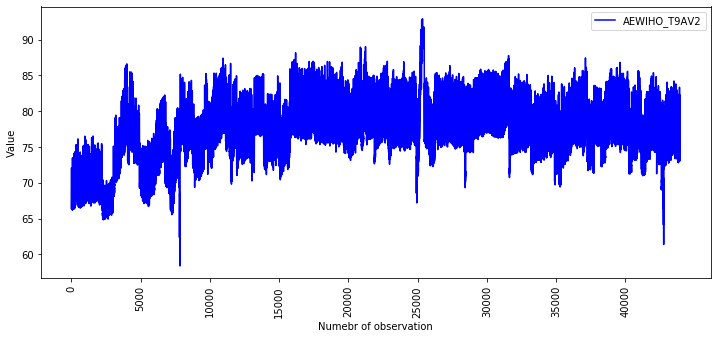

In [41]:
# =============================================================================
# plot dataframe where target column free from outlier by resetting index as it is easy to interpret
# =============================================================================
dataframe_target_column_free_from_outlier_copy = dataframe_target_column_free_from_outlier.copy()
dataframe_reset_target_column_free_from_outlier = dataframe_target_column_free_from_outlier_copy.reset_index()
print(dataframe_reset_target_column_free_from_outlier.shape)
plt.plot(dataframe_reset_target_column_free_from_outlier[target_column], color = 'blue')
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_reset_target_column_free_from_outlier.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('final_target_column_after_removing_outlier.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

(43862, 7)


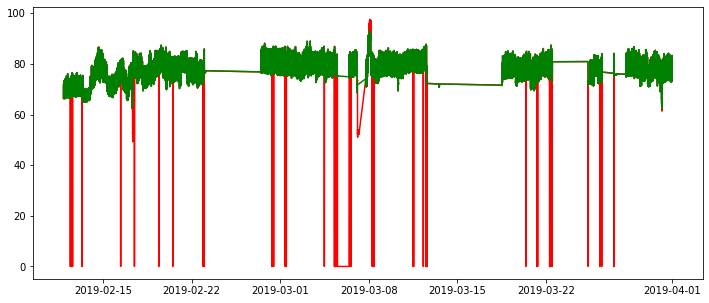

385


In [44]:
# function to remove outlier from a whole dataframe
dataframe_free_from_outlier = free_dataframe_from_outlier(dataframe_datetime) 
print(dataframe_free_from_outlier.shape)

plt.plot(dataframe_datetime[target_column], color ='red')
plt.plot(dataframe_free_from_outlier[target_column], color = 'green')
plt.show()

dataframe_free_from_outlier.describe()
dataframe_target_column_free_from_outlier.describe()
count =0
for i in dataframe_datetime[target_column]:
    if i < 62.48:
        count +=1
print(count)

arr =[]
for i in dataframe_datetime.columns:
    arr.append(i)

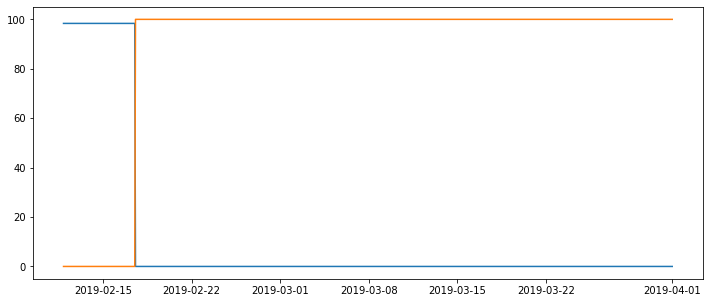

In [45]:
plt.plot(dataframe_datetime[furnace_signal_column_a])
plt.plot(dataframe_datetime[furnace_signal_column_b])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f77649b5160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f776499eef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f77649b53c8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f776499ed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f776499e198>],
 'means': []}

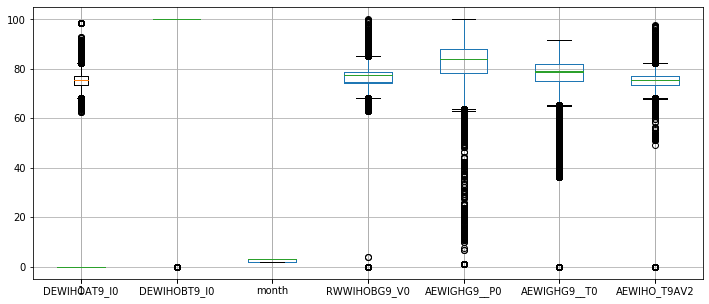

In [46]:
boxplot_dateTime = dataframe_datetime.boxplot(column = arr)
boxplot_target_column_free_from_outlier = dataframe_target_column_free_from_outlier.boxplot(column=arr)
boxplot_dataframe_free_from_outlier = dataframe_free_from_outlier.boxplot(column=arr)

plt.boxplot(dataframe_free_from_outlier[target_column])

In [48]:
# for column in dataframe_datetime:
#     plt.figure()
#     if column == dataframe_datetime.columns[-1]:
#         break
#     else:
#         dataframe_datetime.boxplot(by = dataframe_datetime.columns[-1],column = column)

In [33]:
# Feature selection with Sklearn feature best technique
# sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [34]:
# feature selection with Pearson Correlation.
# sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [50]:
# correlation_csv = main_correlation.to_csv('high_correlation_feb_march_april_may.csv')
main_correlation = pearson_correlation(dataframe_target_column_free_from_outlier)

main_frame = dataframe_target_column_free_from_outlier
correlated_frame = main_correlation
print(main_frame.shape)
print(correlated_frame.shape)
print(correlated_frame)

(43953, 7)
(7, 7)
              DEWIHOAT9_I0  DEWIHOBT9_I0     month  RWWIHOBG9_V0  \
DEWIHOAT9_I0      1.000000     -1.000000 -0.568927     -0.978009   
DEWIHOBT9_I0     -1.000000      1.000000  0.568927      0.978009   
month            -0.568927      0.568927  1.000000      0.562187   
RWWIHOBG9_V0     -0.978009      0.978009  0.562187      1.000000   
AEWIGHG9__P0     -0.642802      0.642802  0.436309      0.673517   
AEWIGHG9__T0     -0.660612      0.660612  0.423689      0.699264   
AEWIHO_T9AV2     -0.558844      0.558844  0.366816      0.634753   

              AEWIGHG9__P0  AEWIGHG9__T0  AEWIHO_T9AV2  
DEWIHOAT9_I0     -0.642802     -0.660612     -0.558844  
DEWIHOBT9_I0      0.642802      0.660612      0.558844  
month             0.436309      0.423689      0.366816  
RWWIHOBG9_V0      0.673517      0.699264      0.634753  
AEWIGHG9__P0      1.000000      0.901980      0.687076  
AEWIGHG9__T0      0.901980      1.000000      0.743820  
AEWIHO_T9AV2      0.687076      0.7438

In [51]:
# dataframe_datetime.to_csv('dataframe_datetime_feb_march_april_may.csv')
dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

print(dataframe_high_correlation.shape)
dataframe_high_correlation.describe()

(43953, 4)


,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,AEWIHO_T9AV2
count,43953.000000,43953.000000,43953.000000,43953.000000
mean,64.233875,82.039010,77.881654,75.393140
std,30.286365,8.572489,5.662907,4.109084
min,0.000000,9.853600,37.072978,58.370486
25%,74.606240,78.331123,75.194708,73.412798
50%,77.342536,84.039662,78.969481,75.581076
75%,78.840011,88.142640,81.826243,77.016193
max,95.316354,100.000000,91.486047,92.908761


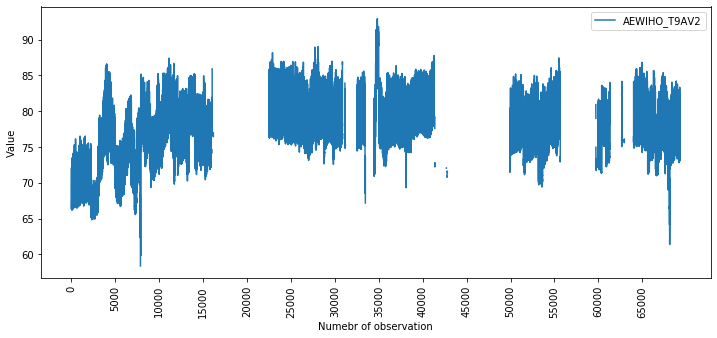

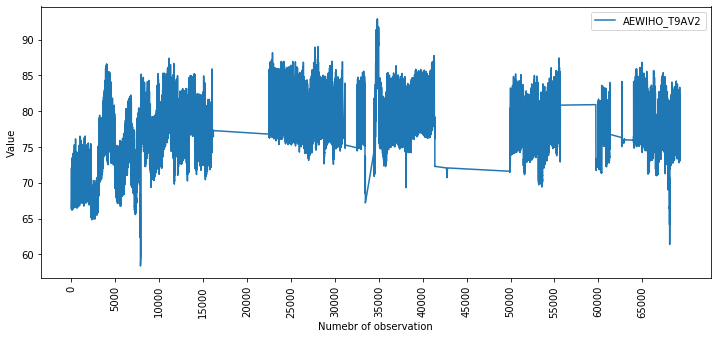

In [55]:
dataframe_resample = dataframe_high_correlation.resample('1min').mean()
dataframe_resample_copy = dataframe_resample.copy()
dataframe_resample_copy = dataframe_resample_copy.reset_index()

dataframe_interpolate = dataframe_resample.interpolate('linear')
dataframe_interpolate_copy = dataframe_interpolate.copy()
dataframe_interpolate_copy = dataframe_interpolate_copy.reset_index()

plt.plot(dataframe_resample_copy[target_column])
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_resample_copy.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('resample.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

plt.figure()

plt.plot(dataframe_interpolate_copy[target_column])
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_interpolate_copy.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('resample.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

In [52]:
# print(dataframe_high_correlation.shape)
# dataframe_high_correlation.describe()
# dataframe_high_correlation.describe()['RWWIHOBG9_V0']['std']

In [61]:
# # take column who has STD within 20
# a=[]
# for i in dataframe_high_correlation.columns:
#     if dataframe_high_correlation.describe()[i]['std']<=25:
#         a.append(i)
        
# print(a)

In [62]:
# data = dataframe_high_correlation.iloc[:][a]

In [ ]:
# a = dataframe_high_correlation.loc[:,target_column]
# type(a)
import seaborn as sns
sns.pairplot(data, height = 2.5)

In [48]:
# dataframe_high_correlation = data

In [56]:
# dataframe_resample = dataframe_high_correlation.resample('1min').mean()
# monthly_resampled_data = dataframe_high_correlation.AEWIHO_T9AV2.resample('1min').pad()
# dataframe_resample_copy = dataframe_resample.copy()
# dataframe_resample_copy = dataframe_resample_copy.reset_index()

In [40]:
print(dataframe_resample.shape)
print(dataframe_high_correlation.shape)
print(monthly_resampled_data.shape)
print(type(monthly_resampled_data))

(69303, 4)
(43923, 4)
(69303,)
<class 'pandas.core.series.Series'>


In [57]:
# def inter_pol(df):
#     # loop through all the columns
#     for i, column in enumerate ( df.columns ):
    
#         # find the last row with value not zero
#         x = df [ df[column] != 0 ].index [ -1 ]
#         print(x)
#         # get the last value before the zero values
#         y = df[column] [x]
#         # find and fill the rows greater than date "x" with value "y"
#         mask = (df.index > x)
#         df[column] [ mask ] = y
#         return df
        
# ds_high = inter_pol(dataframe_high_correlation)
# print(ds_high.shape)


In [58]:
# # plt.plot(monthly_resampled_data)
# print(dataframe_no_string.shape)
# print(dataframe_datetime.shape)
# plt.plot(dataframe_no_string[target_column])
# plt.figure()
# plt.plot(dataframe_datetime[target_column])

In [59]:
# print(dataframe_resample_copy.shape)

# plt.plot(dataframe_resample_copy[target_column], color = 'blue')
# plt.legend([target_column], loc='best')
# # plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# # plt.xticks(rotation = 'vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.xlim(dataframe_resample_copy.index[0],dataframe_resample_copy.index[-1])
# plt.xticks(np.arange(0,dataframe_resample_copy.shape[0],5000),rotation='vertical')
# # plt.savefig('resample.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12, 5)

In [60]:
# dataframe_interpolate = dataframe_resample.interpolate('linear')
# dataframe_interpolate_copy = dataframe_interpolate.copy()
# dataframe_interpolate_copy = dataframe_interpolate_copy.reset_index()

In [61]:
# print(dataframe_interpolate_copy.shape)
# plt.plot(dataframe_interpolate_copy[target_column], color = 'blue')
# plt.legend([target_column], loc='best')
# # plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# # plt.xticks(rotation = 'vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.xlim(dataframe_interpolate.index[0],dataframe_interpolate.index[-1]+5)
# plt.xticks(np.arange(0,dataframe_interpolate_copy.shape[0],5000),rotation = 'vertical')
# # plt.savefig('interpolation.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12, 5)

In [62]:
# b = 0
# for i in dataframe_resample.index:
#     a = i
#     if a == b:
#         print(i)
#     b = a

In [63]:
# c = [1,2,3,4,5,6,10,-5,5]

# b = 0
# for i in c:
#     a = i
#     if a == b:
#         print(i)
#     b = a

In [64]:
# print(dataframe_resample.index.duplicated(keep='first'))

# df_2 = dataframe_resample.groupby(dataframe_resample.index).first()

In [65]:
# df_int_1 = dataframe_resample.interpolate(method='spline', order=1)
# print(df_int_1.shape)
# df_int_1.isna().sum()

In [66]:
# plt.plot(df_int_1[target_column])

In [67]:
# df_int_2 = dataframe_resample.ffill(axis = 0)

In [68]:
# plt.plot(df_int_2[target_column])

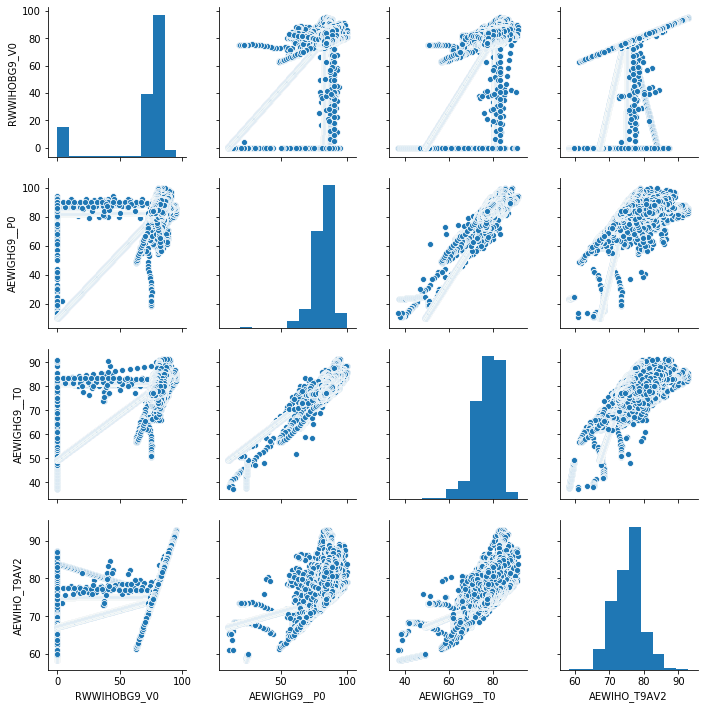

In [69]:
import seaborn as sns
sns.pairplot(dataframe_interpolate_copy, height = 2.5)

In [ ]:
# dataframe_interpolate_poly = dataframe_resample.interpolate('time')

In [ ]:
# print(dataframe_interpolate_poly.shape)
# plt.plot(dataframe_interpolate_poly[target_column], color = 'blue')
# plt.legend([target_column], loc='best')
# # plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# # plt.xticks(rotation = 'vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.xlim(dataframe_interpolate.index[0],dataframe_interpolate.index[-1]+5)
# # plt.xticks(np.arange(0,dataframe_interpolate_poly.shape[0],5000),rotation = 'vertical')
# # plt.savefig('interpolation.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# multivariate_column_label = ['AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.94


In [ ]:
# for i in dataframe_high_correlation:
#     plt.plot(dataframe_high_correlation[i])
#     plt.title(str(i))
#     plt.show()
    
    
#     # plt.plot(dataframe_high_correlation['AEWIHOBKF_V0'])

In [ ]:
# dataframe_high_correlation_1 = dataframe_high_correlation.drop(['AEWIHOBKF_V0'], axis=1)
# print(dataframe_high_correlation_1.shape)
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [ ]:
# current_directory = os.getcwd()
# print('current_directory is: ',current_directory)
# address = 'image_folder'
# final_directory = current_directory+'/'+str(address)
# if not os.path.exists(final_directory):
#     os.makedirs(final_directory)
#     print('created : ', final_directory)
# else:
#     print(' has already created',final_directory)
#     pass

In [42]:
dataframe_interpolate.shape

(69303, 4)

In [ ]:
from dataset_analysis import draw_feature_vs_target
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'+'_'+str(today)
draw_feature_vs_target = draw_feature_vs_target(dataframe_interpolate,final_directory,subfolder_1)

In [43]:
# def make_dataset(dataframe, required_number_of_test_data):
#     dataset = np.array(dataframe)
    
#     go_for_training = int(len(dataset)-required_number_of_test_data)
#     print('go_for_training: ', go_for_training)
#     print('required_number_of_test_data: ', required_number_of_test_data)
#     percentage = go_for_training/int(len(dataset))
#     print('percentage: ',percentage)
    
#     NumberOfElements = int(len(dataset) * percentage)
#     print('Number of Elements for training: ', NumberOfElements)
#     print('dataset length: ', len(dataset))

#     train_input = dataset[0:NumberOfElements, 0:-1]
#     print('train_input shape: ', train_input.shape)
#     train_output = dataset[0:NumberOfElements, -1]
#     print('train_output shape: ', train_output.shape)

#     test_input = dataset[NumberOfElements:len(dataset), 0:-1]
#     test_output = dataset[NumberOfElements:len(dataset), -1]
    

# #     test_input = test_input[500:560]
# #     test_output = test_output[500:560]
#     print('test_input shape: ', test_input.shape)
#     print('test_output shape: ', test_output.shape)

#     return train_input, train_output, test_input, test_output

In [70]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_interpolate,required_number_of_test_data)

model_list = [LinearRegression(fit_intercept=True),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

go_for_training:  69103
required_number_of_test_data:  200
percentage:  0.9971141220437788
Number of Elements for training:  69103
dataset length:  69303
train_input shape:  (69103, 3)
train_output shape:  (69103,)
test_input shape:  (200, 3)
test_output shape:  (200,)


------- LinearRegression
<class 'numpy.ndarray'>
r_2 statistic: 0.13
Mean_absolute_error: 2.01
Mean squared error: 5.70
RMSE:  2.387227972407205
!!!!---------------!!!!----------------!!!!
------- Lasso
<class 'numpy.ndarray'>
r_2 statistic: 0.13
Mean_absolute_error: 2.01
Mean squared error: 5.71
RMSE:  2.390230256568906
!!!!---------------!!!!----------------!!!!
------- Ridge
<class 'numpy.ndarray'>
r_2 statistic: 0.13
Mean_absolute_error: 2.01
Mean squared error: 5.70
RMSE:  2.3872281145143406
!!!!---------------!!!!----------------!!!!
------- BayesianRidge
<class 'numpy.ndarray'>
r_2 statistic: 0.13
Mean_absolute_error: 2.01
Mean squared error: 5.70
RMSE:  2.3873013742667477
!!!!---------------!!!!----------------!!!!
------- tree
<class 'numpy.ndarray'>


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


r_2 statistic: 0.83
Mean_absolute_error: 0.92
Mean squared error: 1.10
RMSE:  1.0507933197441959
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:154: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<class 'numpy.ndarray'>


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


r_2 statistic: 1.00
Mean_absolute_error: 0.03
Mean squared error: 0.00
RMSE:  0.04948217493296864
!!!!---------------!!!!----------------!!!!
------- BaggingRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-pa

<class 'numpy.ndarray'>


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


r_2 statistic: 1.00
Mean_absolute_error: 0.03
Mean squared error: 0.00
RMSE:  0.040863608213045445
!!!!---------------!!!!----------------!!!!
------- GBR


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:154: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<class 'numpy.ndarray'>


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/model_file.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


r_2 statistic: 0.99
Mean_absolute_error: 0.15
Mean squared error: 0.04
RMSE:  0.21132921403503122
!!!!---------------!!!!----------------!!!!


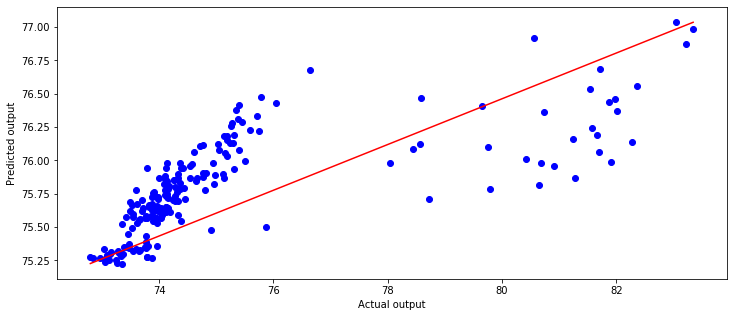

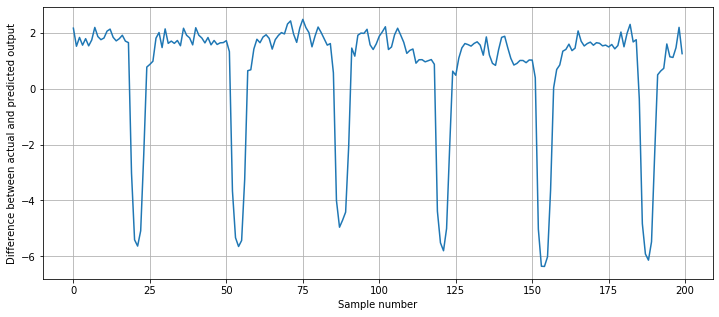

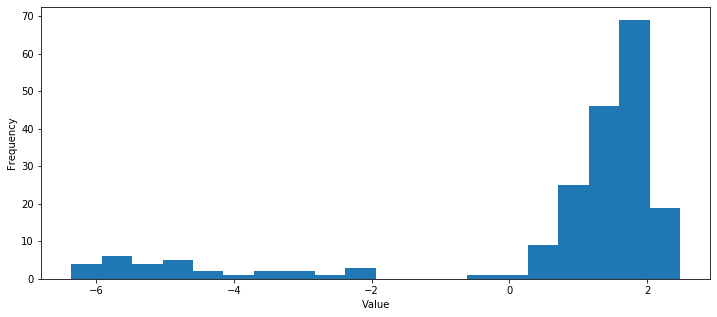

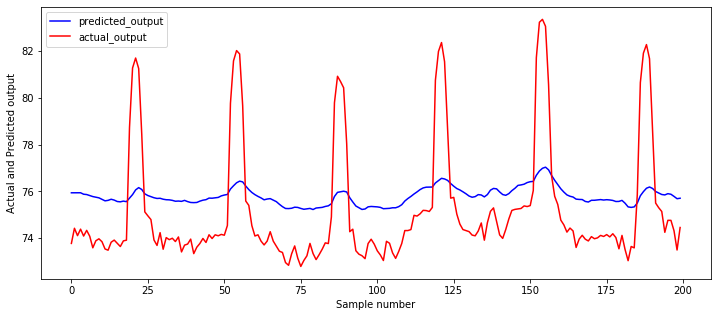

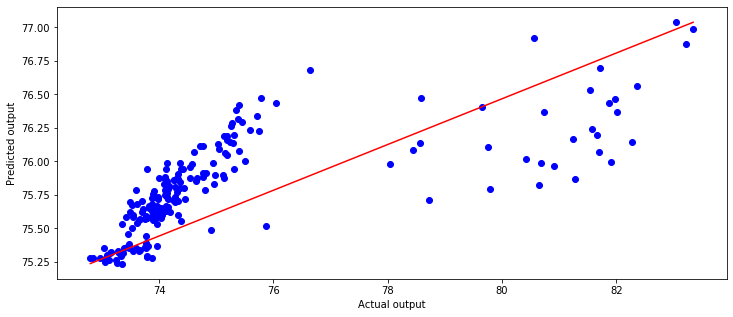

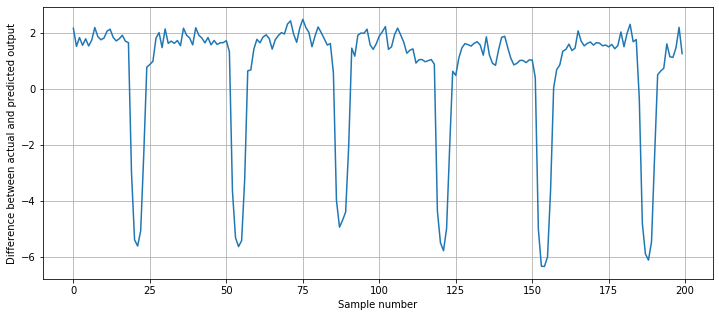

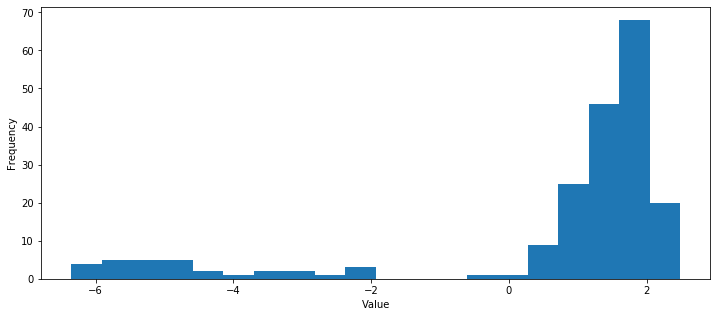

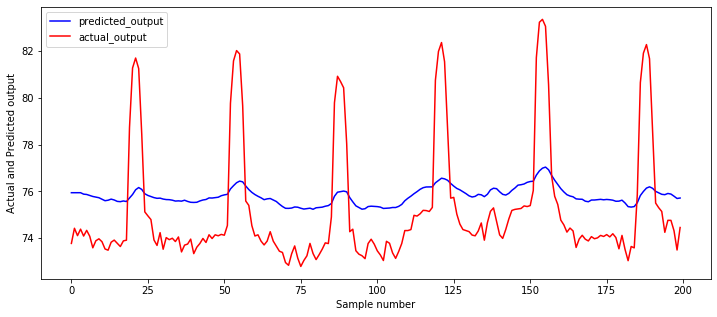

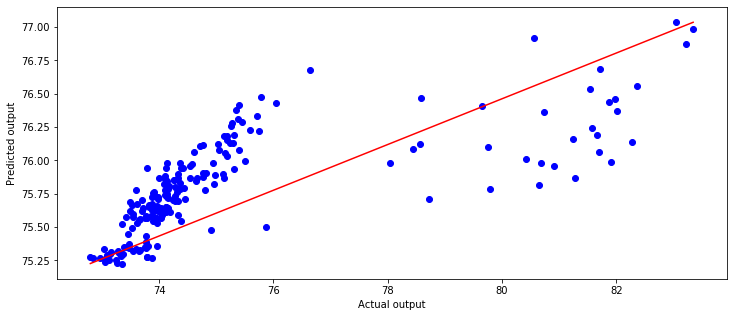

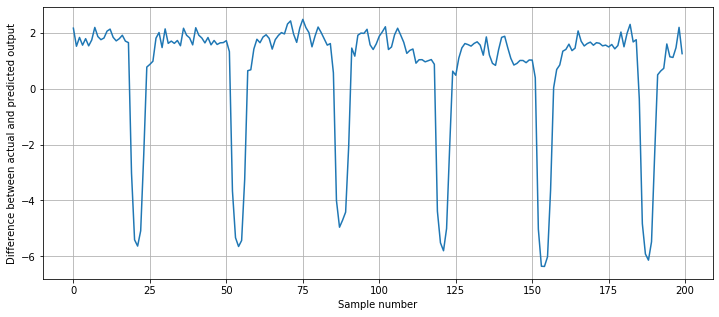

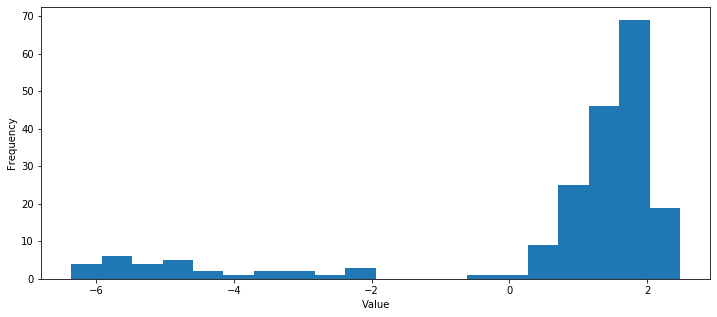

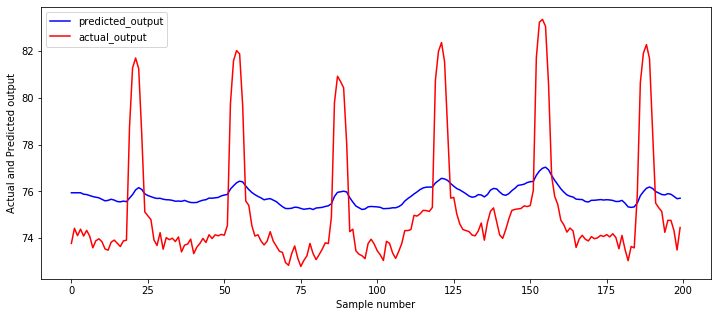

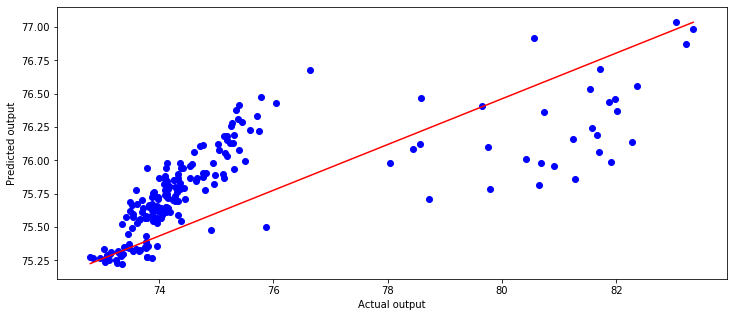

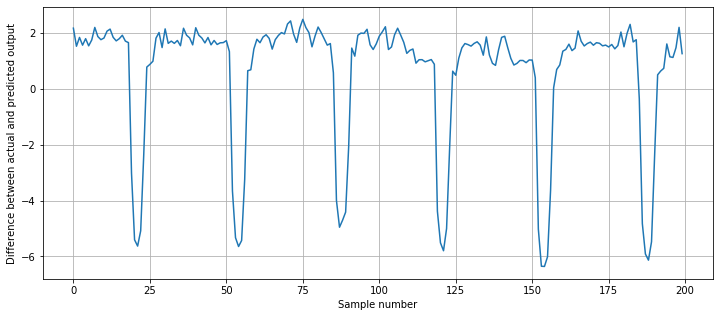

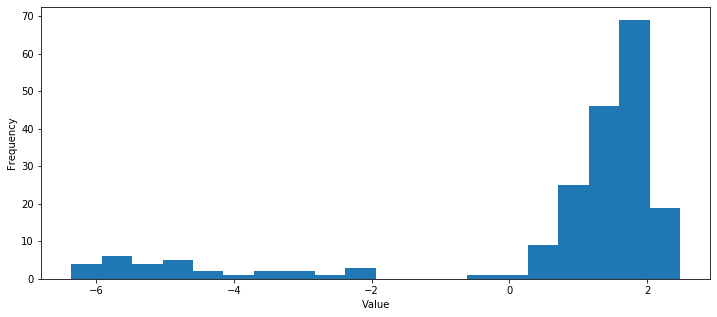

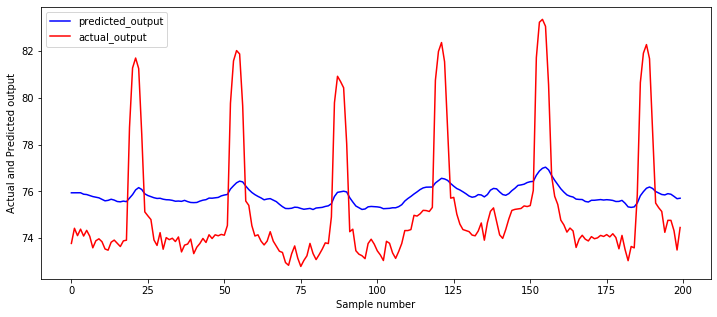

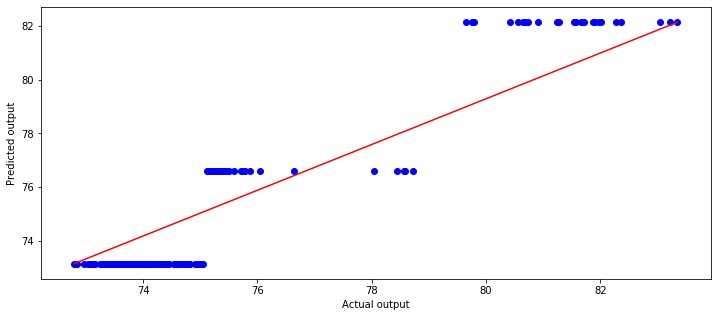

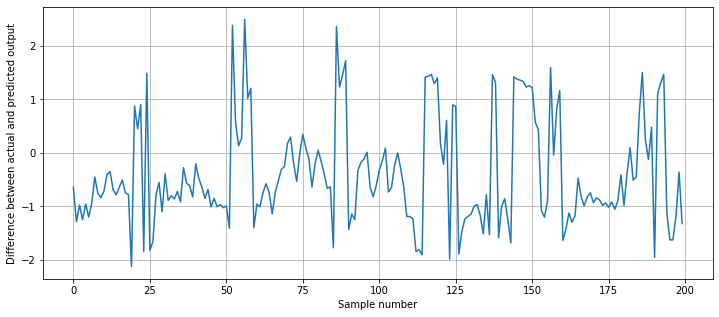

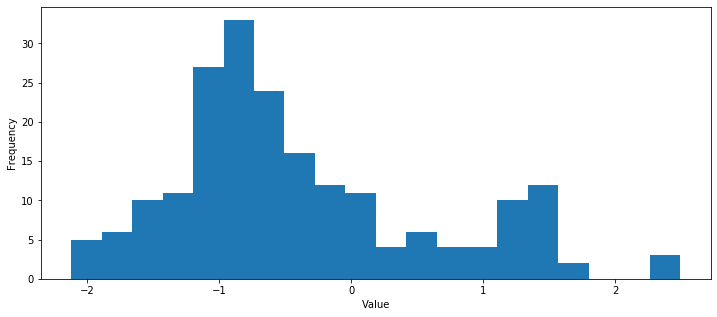

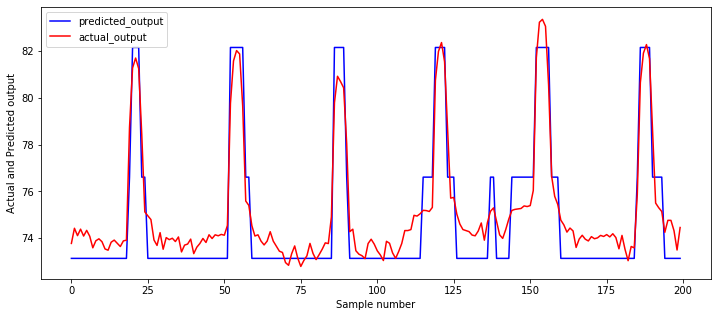

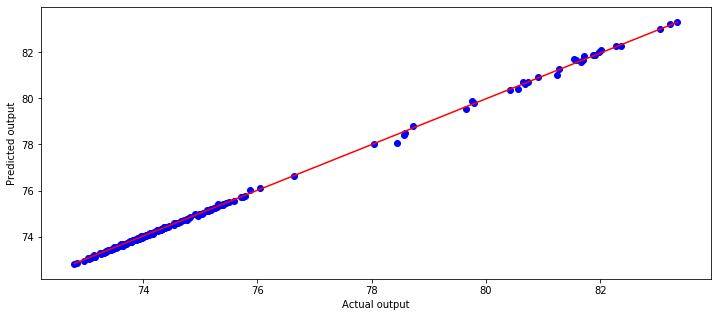

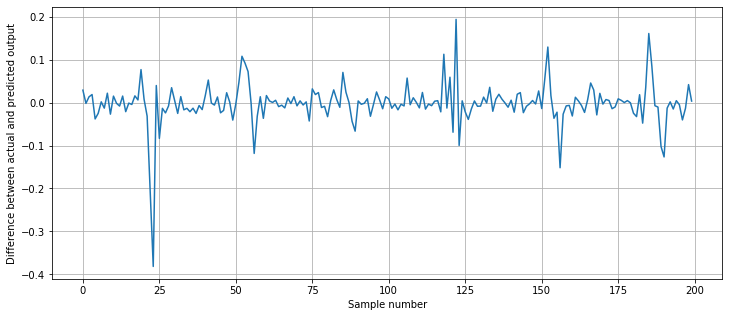

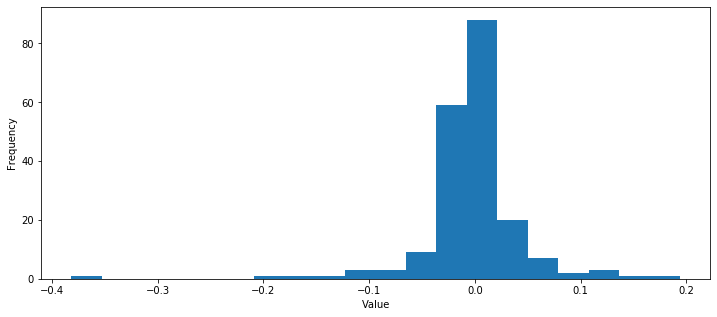

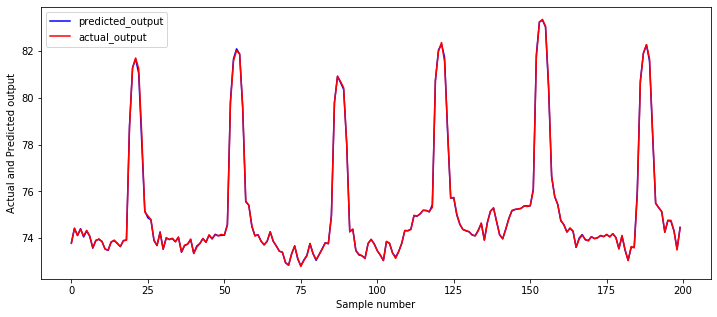

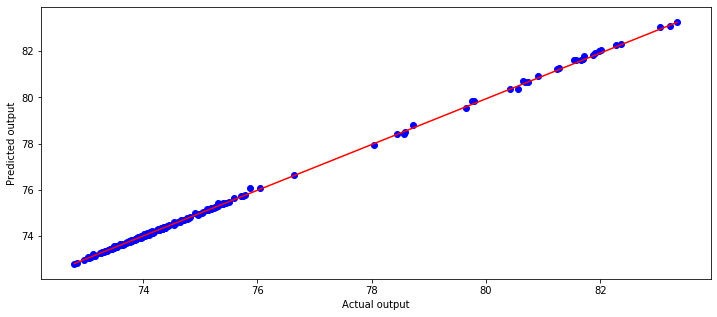

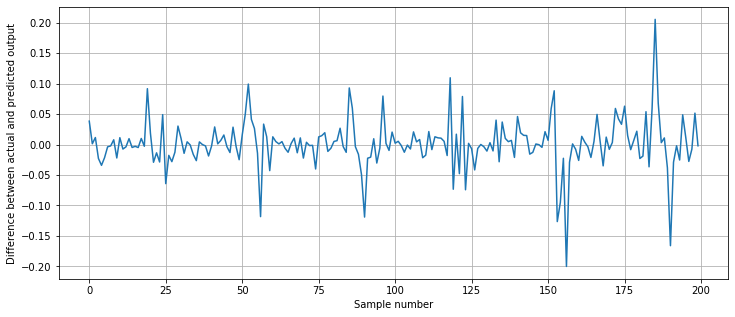

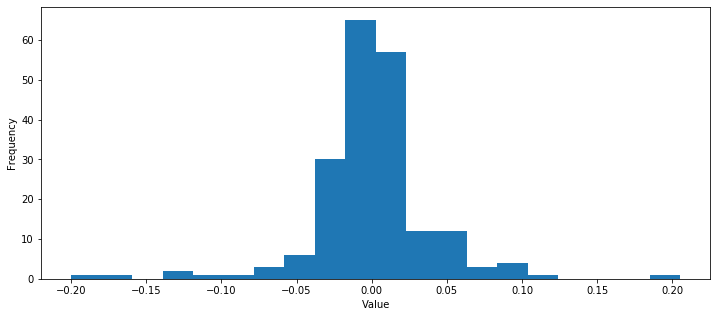

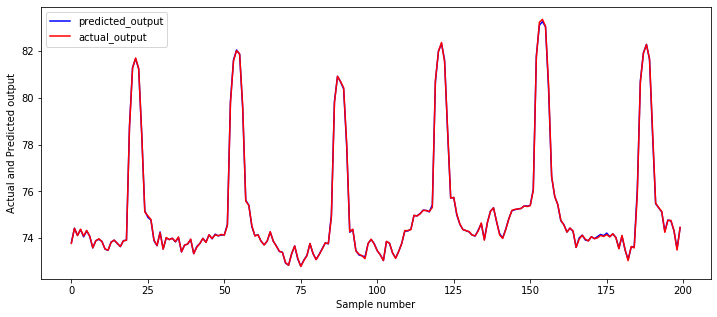

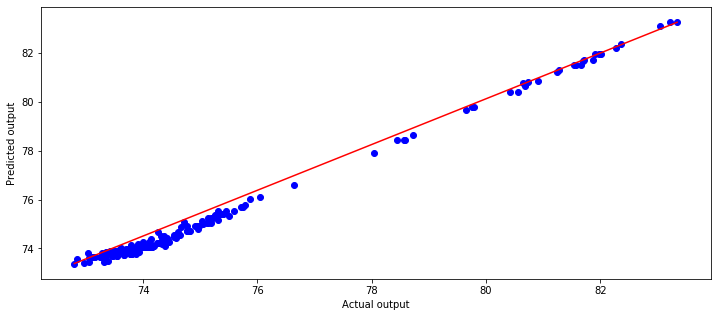

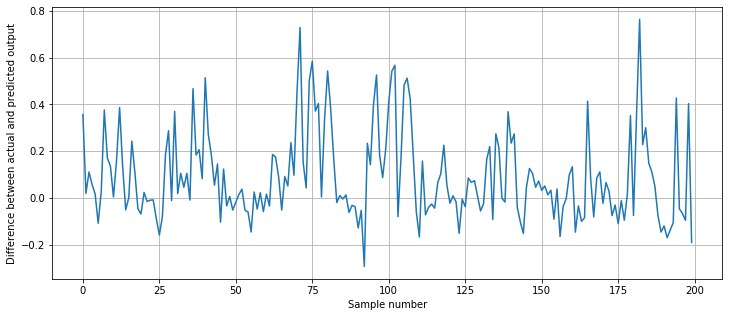

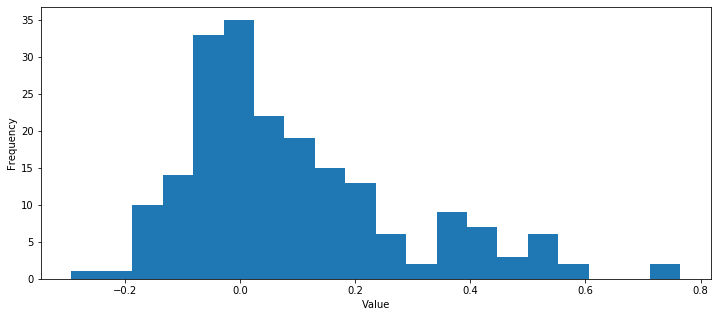

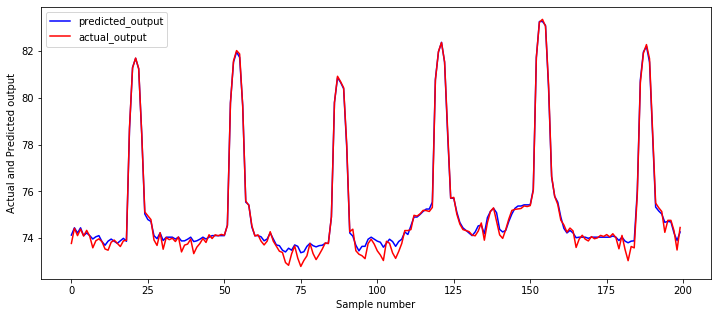

<Figure size 864x360 with 0 Axes>

In [71]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output,
                           final_directory, evaluation_metrics_file_path)

In [72]:
# rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
# print(type(rowData))
# print(rowData.shape)
# rowData.head(3)

dataframe_high_correlation.tail()

,RWWIHOBG9_V0,AEWIGHG9__P0,AEWIGHG9__T0,AEWIHO_T9AV2
dateTime,,,,
2019-03-31 23:55:00,76.618492,85.093645,77.858005,74.766040
2019-03-31 23:56:00,76.590632,84.642071,77.822379,74.764187
2019-03-31 23:57:00,76.146138,84.233563,77.617737,74.324228
2019-03-31 23:58:00,75.337882,84.094021,77.408532,73.498997
2019-03-31 23:59:00,76.299368,83.961302,77.354675,74.459244


In [ ]:
df = dataframe_date_time_type(dataframe_high_correlation)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = '3_date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = '3_week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = '3_day_fig_target')

In [ ]:
# train_ip_reg = train_input[0:500,:]
# train_op_reg = train_output[0:500]

# test_ip_reg = test_input[0:10,:]
# test_op_reg = test_output[0:10]

# print(train_ip_reg.shape)
# print(train_op_reg.shape)

# print('#'*10)

# print(test_ip_reg.shape)
# print(test_op_reg.shape)

In [185]:
from sklearn import *
import sklearn
from joblib import dump, load

In [186]:
my_model = BaggingRegressor(ExtraTreesRegressor())
# my_model = sklearn.linear_model.LinearRegression(fit_intercept=True)
# my_model = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
# my_model = ExtraTreesRegressor()
my_model.fit(train_input, train_output)
print('score: ',my_model.score(train_input, train_output))

# file_name = 'saved_scikit_model_decision_tree.joblib'

# dump(my_model, file_name)
# clf = load(file_name)

score:  0.999996366855406


In [188]:
my_pred = my_model.predict(test_input)
# my_pred = clf.predict(test_input)

<Figure size 864x360 with 0 Axes>

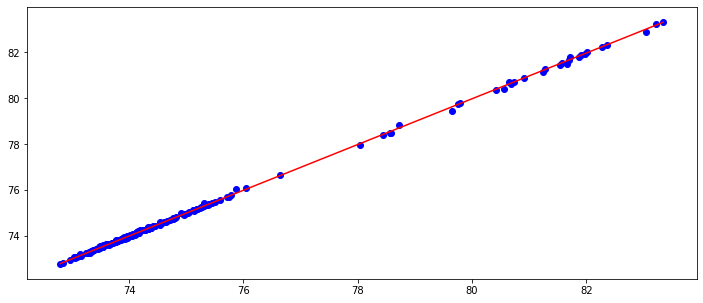

<Figure size 864x360 with 0 Axes>

In [189]:
plt.plot((min(test_output), max(test_output)), (min(my_pred), max(my_pred)), color='red')
plt.scatter(test_output, my_pred, color='blue')

plt.figure()

# difference = test_output-my_pred
# plt.plot(difference)

# plt.plot((min(test_op_reg), max(test_op_reg)), (min(my_pred), max(my_pred)), color='red')
# plt.scatter(test_op_reg, my_pred, color='blue')

In [190]:
test_op_reg = test_output
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_op_reg,my_pred))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_op_reg,my_pred))
print("Mean squared error: %.2f" % mean_squared_error(test_op_reg,my_pred))
RMSE=math.sqrt(mean_squared_error(test_op_reg,my_pred))
print('RMSE: ',RMSE)

r_2 statistic: 1.00
Mean_absolute_error: 0.03
Mean squared error: 0.00
RMSE:  0.041838599241741964


In [ ]:
import graphviz 
dot_data = tree.export_graphviz(my_model, out_file='mytree_1.dot',feature_names =['f1','f2','f3'])

In [ ]:
from sklearn import tree  
import pydotplus

try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

dotfile = StringIO()
tree.export_graphviz(my_model, out_file=dot_data.dot)
# graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
(graph,)=pydot.graph_from_dot_data(dotfile.getvalue())

graph.write_png("dtree.png")

In [ ]:
tree.export_graphviz(my_model, out_file='newtree.dot') #produces dot file

import pydot
dotfile = StringIO()
tree.export_graphviz(my_model, out_file=dotfile)
pydot.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(my_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# scikit learn Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(my_model,train_input,train_output, cv=10
                                                              ,scoring = 'neg_mean_squared_error')

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


import pandas as pd
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
# print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
# print('\n', '-' * 20) # separator
# print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

print('train_size: ', train_sizes)

In [ ]:
validation_scores_mean.max()

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(train_scores_mean.min()-5,validation_scores_mean.max()+5)
plt.savefig('learning_curve_BaggingRegressor.png',bbox_inches='tight')
plt.show()

# Neural Network

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [47]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

print(train_input.shape)
epochs = 30

(69103, 3)


In [48]:
# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='glorot_uniform',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='glorot_uniform',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='glorot_uniform',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='glorot_uniform',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.compile(optimizer='adam', loss='mse',metrics=['mse','accuracy'])
NN_model.summary()

W1016 09:49:48.038750 140372936632128 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:64: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1016 09:49:48.050347 140372936632128 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:497: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1016 09:49:48.052416 140372936632128 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3636: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1016 09:49:48.095940 140372936632128 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,377
Trainable params: 165,377
Non-trainable params: 0
_________________________________________________________________


In [49]:
train_model_NN = NN_model.fit(train_input, train_output, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.2,shuffle=True,
                            callbacks=[LearningRateScheduler(lr_schedule)])

W1016 09:49:48.666694 140372936632128 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:958: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1016 09:49:48.675670 140372936632128 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:680: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1016 09:49:48.728854 140372936632128 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:945: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 55282 samples, validate on 13821 samples
Epoch 1/30
55282/55282 [==============================] - 6s 116us/step - loss: 21.9933 - mean_squared_error: 21.9933 - acc: 0.0000e+00 - val_loss: 0.8968 - val_mean_squared_error: 0.8968 - val_acc: 0.0000e+00
Epoch 2/30
55282/55282 [==============================] - 6s 110us/step - loss: 4.8046 - mean_squared_error: 4.8046 - acc: 0.0000e+00 - val_loss: 1.3490 - val_mean_squared_error: 1.3490 - val_acc: 0.0000e+00
Epoch 3/30
55282/55282 [==============================] - 6s 112us/step - loss: 3.5282 - mean_squared_error: 3.5282 - acc: 0.0000e+00 - val_loss: 0.4044 - val_mean_squared_error: 0.4044 - val_acc: 0.0000e+00
Epoch 4/30
55282/55282 [==============================] - 6s 111us/step - loss: 2.6049 - mean_squared_error: 2.6049 - acc: 0.0000e+00 - val_loss: 0.3869 - val_mean_squared_error: 0.3869 - val_acc: 0.0000e+00
Epoch 5/30
55282/55282 [==============================] - 7s 118us/step - loss: 2.1971 - mean_squared_error: 2.1971 

In [50]:
print(train_model_NN.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'val_acc', 'loss', 'mean_squared_error', 'acc'])


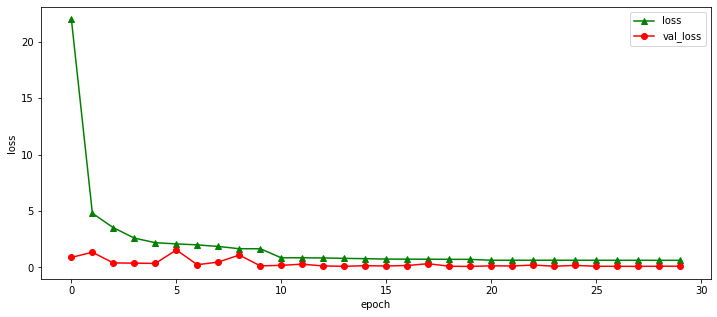

In [51]:
# summarize history for accuracy
plt.plot(train_model_NN.history['loss'],'-^', color = 'green')
plt.plot(train_model_NN.history['val_loss'],'-o', color = 'red')

# plt.plot(train_model_NN.history['mean_squared_error'],'-^', color = 'green')
# plt.plot(train_model_NN.history['val_mean_squared_error'],'-o', color = 'red')
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='best')
# plt.savefig('Neural_Network_loss_vs_epoch_shuffle_True.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] =(12,5)

In [52]:
NN_model.save("NN_model.h5")
from keras.models import load_model
load_trained_NN=load_model("NN_model.h5")

In [53]:
# predicted_output_NN = NN_model.predict(test_input)
predicted_output_NN = load_trained_NN.predict(test_input)

In [54]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output_NN))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output_NN))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output_NN))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output_NN))
print('RMSE: ',RMSE)

r_2 statistic: 1.00
Mean_absolute_error: 0.15
Mean squared error: 0.03
RMSE:  0.18028915238928422


In [55]:
test_output_NN = np.reshape(test_output,(-1,1))
test_output_NN.shape

(200, 1)

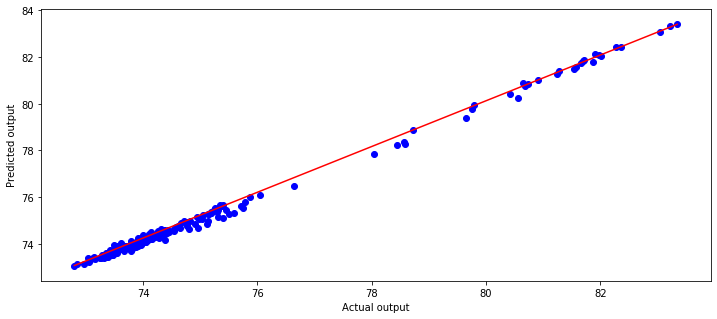

<class 'numpy.ndarray'>


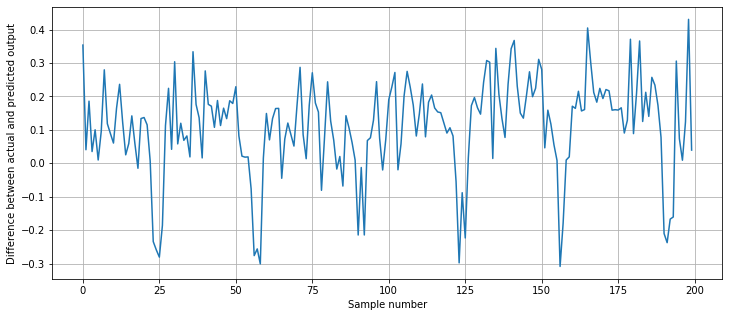

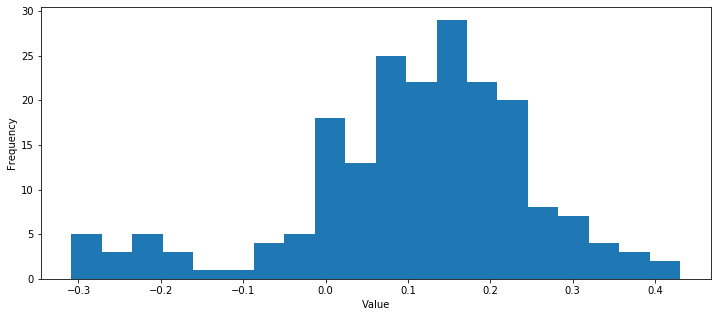

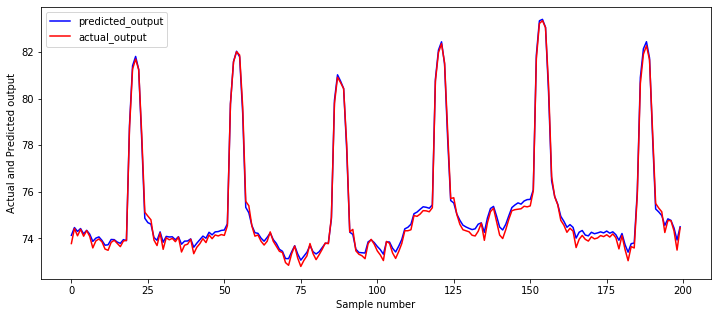

In [56]:
plot_graph(test_output_NN, predicted_output_NN, final_directory,'Neural_Network')

In [57]:
evaluation_metrices(test_output_NN,predicted_output_NN,final_directory,'Neural Netowrk', evaluation_metrics_file_path)

r_2 statistic: 1.00
Mean_absolute_error: 0.15
Mean squared error: 0.03
RMSE:  0.18028915238928422
!!!!---------------!!!!----------------!!!!


# LSTM

In [ ]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
multiple_ip_train_data, multiple_ip_test_set = make_dataset_LSTM(dataframe_interpolate, required_number_of_test_data)

In [ ]:
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, number_of_step_lstm)

In [ ]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

In [ ]:
samples = X_Conv_Lstm.shape[0]
time = number_of_step_lstm
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

In [ ]:
# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [ ]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('X_Conv_Lstm_train shape: ',X_Conv_Lstm_train.shape,'\tX_Conv_Lstm_train size: ',X_Conv_Lstm_train.size,'\tX_Conv_Lstm_train dimension: ',X_Conv_Lstm_train.ndim)

In [ ]:
lr = 0.01

def lr_schedule(epoch):
    print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
    print('now lr_1: ', lr_1)
    return lr_1

batch_size = batch_size
activation_function = 'relu'

In [ ]:
model = LSTM_model(activation_function, time, rows, cols, channels)

In [ ]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2, 
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

In [ ]:
print(train_model.history.keys())

# summarize history for accuracy
# plt.plot(train_model_vanilla.history['acc'], '-o', color = 'red')
plt.plot(train_model.history['loss'],'-^', color = 'green')
plt.plot(train_model.history['val_loss'],'-o', color = 'red')
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='best')
# plt.savefig('vanilla_lstm_loss_vs_epoch_shuffle_false.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] =(12,5)

In [ ]:
# model.save_weights("CONV_LSTM_model.h5")
model.save("CONV_LSTM_model.h5")

In [ ]:
from keras.models import load_model
load_trained_CONV_LSTM=load_model("CONV_LSTM_model.h5")
# load_trained_model=load_model("/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/CONV_LSTM_model.h5")

In [ ]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, number_of_step_lstm)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)
print('y_Conv_Lstm_test shape: ', y_Conv_Lstm_test.shape,'\t y_Conv_Lstm_test dimension: ', y_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

In [ ]:
yhat = model.predict(x_input, verbose=1)

In [ ]:
yhat_loaded = load_trained_CONV_LSTM.predict(x_input, verbose=1)

In [ ]:
y_Conv_Lstm_test_reshape = np.reshape(y_Conv_Lstm_test,(-1,1))
y_Conv_Lstm_test_reshape.shape

In [ ]:
plot_graph(y_Conv_Lstm_test_reshape, yhat, final_directory,'CONV_LSTM')

In [ ]:
evaluation_metrices(y_Conv_Lstm_test_reshape, yhat_loaded, final_directory, 'CONV_LSTM',evaluation_metrics_file_path)

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)

# VANILLA LSTM

In [58]:
multiple_ip_train_data, multiple_ip_test_set = make_dataset_LSTM(dataframe_interpolate, required_number_of_test_data)

go_for_training:  69103
required_number_of_test_data:  200
percentage:  0.9971141220437788
dataset length:  69303
Number of Elements for training:  69103
LSTM train set:  (69103, 4)
LSTM test set:  (200, 4)


In [59]:
X_train_vanilla, y_train_vanilla = split_sequence(multiple_ip_train_data, number_of_step_lstm)
# X_train_vanilla, y_train_vanilla = split_sequence(multiple_ip_train_data,5)

In [60]:
print('X_train_vanilla shape: ',X_train_vanilla.shape,'\t dimension: ',X_train_vanilla.ndim,'\t size: ',X_train_vanilla.size)
print('y_train_vanilla shape: ',y_train_vanilla.shape,'\t dimension: ',y_train_vanilla.ndim,'\t size: ',y_train_vanilla.size)

X_train_vanilla shape:  (69101, 2, 3) 	 dimension:  3 	 size:  414606
y_train_vanilla shape:  (69101,) 	 dimension:  1 	 size:  69101


In [61]:
X_train_vanilla = X_train_vanilla.reshape((X_train_vanilla.shape[0], X_train_vanilla.shape[1], X_train_vanilla.shape[-1]))
print(X_train_vanilla.shape)

(69101, 2, 3)


In [62]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.layers import Bidirectional
from keras import optimizers

In [63]:
def vanilla_lstm(n_steps_vanilla, n_features_vanilla):
    model = Sequential()
#     model.add(LSTM(units=100, activation='relu', batch_input_shape=(8,n_steps_vanilla,n_features_vanilla)))
    model.add(LSTM(units=100, activation='relu', input_shape=(n_steps_vanilla, n_features_vanilla),return_sequences=False)) # make False if use only 1 layer.
                                                                                                                                                                #make True if need multi layer
#     model.add(LSTM(100,return_sequences=True))
#     model.add(LSTM(100))
#     model.add(Dropout(0.5))
    model.add(Dense(1))
    return model

In [64]:
n_steps_vanilla = number_of_step_lstm
# n_steps_vanilla = 5
n_features_vanilla = X_train_vanilla.shape[-1]
vanilla_model = vanilla_lstm(n_steps_vanilla, n_features_vanilla)

W1016 09:54:55.573704 140372936632128 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1247: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [65]:
vanilla_model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

In [66]:
vanilla_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               41600     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [67]:
train_model_vanilla = vanilla_model.fit(X_train_vanilla, y_train_vanilla, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.2,
                                        shuffle=True,callbacks=[LearningRateScheduler(lr_schedule)])

W1016 09:54:59.369436 140372936632128 deprecation.py:323] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55280 samples, validate on 13821 samples
Epoch 1/30
55280/55280 [==============================] - 7s 119us/step - loss: 13.6735 - acc: 0.0000e+00 - val_loss: 6.5739 - val_acc: 0.0000e+00
Epoch 2/30
55280/55280 [==============================] - 6s 116us/step - loss: 4.7028 - acc: 0.0000e+00 - val_loss: 8.2597 - val_acc: 0.0000e+00
Epoch 3/30
55280/55280 [==============================] - 6s 117us/step - loss: 4.0197 - acc: 1.8090e-05 - val_loss: 1.9932 - val_acc: 0.0000e+00
Epoch 4/30
55280/55280 [==============================] - 6s 114us/step - loss: 3.6934 - acc: 1.8090e-05 - val_loss: 2.1157 - val_acc: 0.0000e+00
Epoch 5/30
55280/55280 [==============================] - 6s 115us/step - loss: 3.0401 - acc: 1.8090e-05 - val_loss: 2.2875 - val_acc: 0.0000e+00
Epoch 6/30
55280/55280 [==============================] - 6s 117us/step - loss: 3.0980 - acc: 1.8090e-05 - val_loss: 2.0760 - val_acc: 0.0000e+00
Epoch 7/30
55280/55280 [==============================] - 6s 116us/step -

In [68]:
print(train_model_vanilla.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


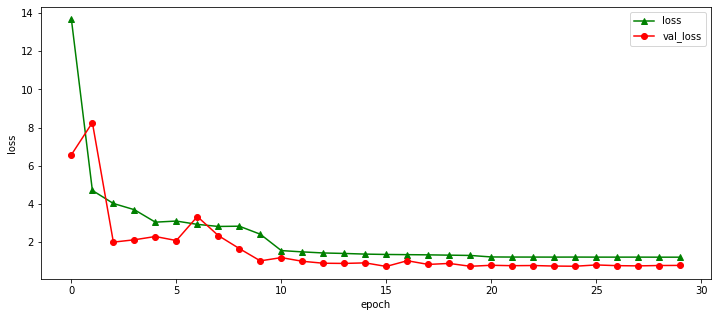

In [69]:
# summarize history for accuracy
# plt.plot(train_model_vanilla.history['acc'], '-o', color = 'red')
plt.plot(train_model_vanilla.history['loss'],'-^', color = 'green')
plt.plot(train_model_vanilla.history['val_loss'],'-o', color = 'red')
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='best')
# plt.savefig('vanilla_lstm_loss_vs_epoch_shuffle_false.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] =(12,5)

In [70]:
vanilla_model.save("VANILLA_LSTM.h5")

In [71]:
from keras.models import load_model
load_trained_VANILLA_LSTM=load_model("VANILLA_LSTM.h5")

In [72]:
test_ip_vanilla,test_op_vanilla=split_sequence(multiple_ip_test_set,number_of_step_lstm)
# test_ip_vanilla,test_op_vanilla=split_sequence(multiple_ip_test_set,1)
n_features_test = test_ip_vanilla.shape[-1]
X_test_ip_vanilla=test_ip_vanilla.reshape((test_ip_vanilla.shape[0], test_ip_vanilla.shape[1], n_features_test))

In [73]:
yhat_vanilla_loaded = vanilla_model.predict(X_test_ip_vanilla, verbose=1)
print(yhat_vanilla_loaded.shape)

198/198 [==============================] - 0s 588us/step
(198, 1)


In [74]:
# evaluate the model
_, train_mse = vanilla_model.evaluate(X_train_vanilla, y_train_vanilla, verbose=0)
_, test_mse = vanilla_model.evaluate(X_test_ip_vanilla, test_op_vanilla, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.000, Test: 0.000


In [75]:
evaluation_metrices(test_op_vanilla, yhat_vanilla_loaded, final_directory, 'VANILLA_LSTM',evaluation_metrics_file_path)

r_2 statistic: 0.84
Mean_absolute_error: 0.65
Mean squared error: 1.06
RMSE:  1.027852294716298
!!!!---------------!!!!----------------!!!!


In [76]:
test_op_vanilla_reshape = np.reshape(test_op_vanilla,(-1,1))
print(test_op_vanilla_reshape.shape)
print(yhat_vanilla_loaded.shape)

(198, 1)
(198, 1)


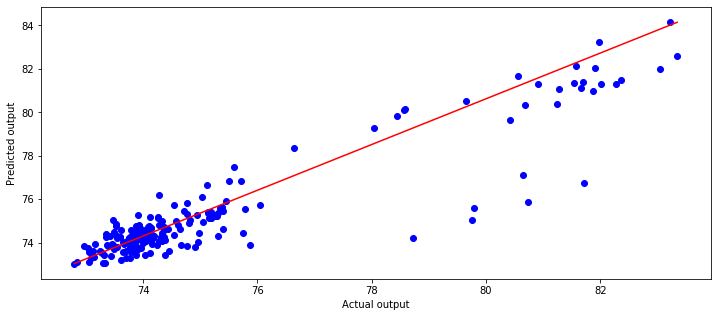

<class 'numpy.ndarray'>


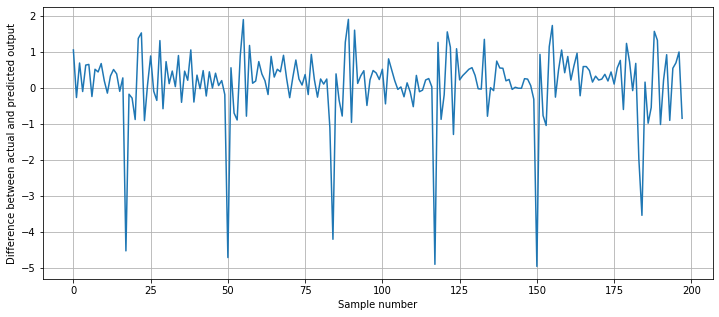

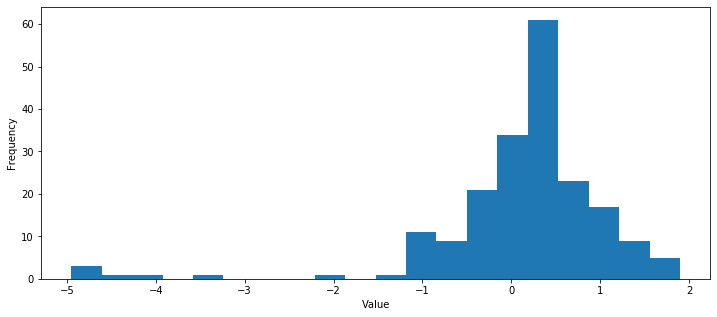

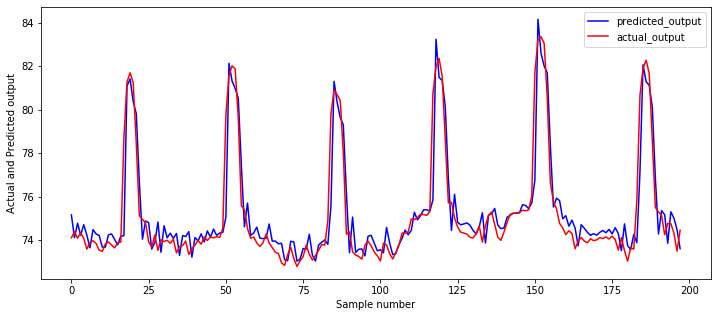

In [77]:
import shutil
plot_graph(test_op_vanilla_reshape, yhat_vanilla_loaded, final_directory,'vanilla_LSTM')

In [ ]:
import numpy as np
A = [12,3,4,5,6,7,8,9,12,10,201,202,21,-2,-3]

In [ ]:
A = np.array(A)
print(type(A))
print(A.shape)

In [ ]:
print(A[0:])

In [ ]:
print(A[-1:])

In [ ]:
print(A[-5:])

# ARIMA TESTING

In [78]:
df = dataframe_interpolate[[target_column]]
# df = dataframe_no_string[[target_column]]

In [79]:
type(df)

pandas.core.frame.DataFrame

In [80]:
df.shape

(69303, 1)

In [59]:
# df

In [119]:
# df_1 = dataframe_no_string.iloc[:,-1]
# type(df_1)

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# from numpy import log
# result = adfuller(df_1.values.dropna())
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

In [81]:
print(df.shape)
# print(df_1.shape)

(69303, 1)


In [82]:
%matplotlib inline
import re
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [83]:
stat, p = stats.normaltest(df.iloc[:,-1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=1115.718, p=0.000
Data does not look Gaussian (reject H0)


69303
34651
(34651, 1) ********** (34651, 1)
75.02067121819843 ********** 75.79539305627044
16.250396774742182 ********** 13.458782766237174


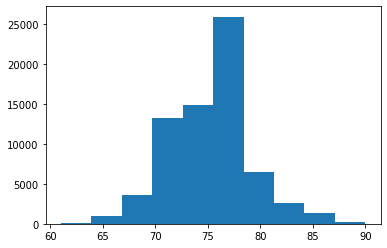

In [84]:
X_hist = df.values
# print(type(X_hist))

X_hist_len = len(X_hist)
print(X_hist_len)
split_len = int(len(X_hist)/2)
print(split_len)

X1, X2 = X_hist[:split_len],X_hist[split_len:-1]
print(X1.shape,'*'*10,X2.shape)

mean_X1, mean_X2 = X1.mean(), X2.mean()
print(mean_X1,'*'*10,mean_X2)

var_X1,var_X2 = X1.var(), X2.var()
print(var_X1,'*'*10,var_X2)

plt.hist(df.iloc[:,-1], bins=10)
plt.show()

In [85]:
total_mean = X_hist.mean()
total_var = X_hist.var()

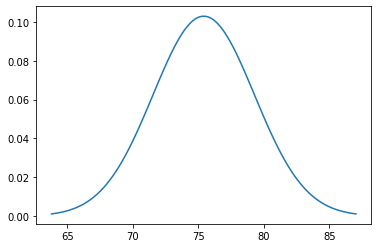

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = total_mean
variance = total_var
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# plt.hist(df.iloc[:,-1])
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [87]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
#     plt.savefig('check_stationarity.jpg')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC',regression='c')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    p_value = dfoutput['p-value']
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s-------)'%key] = value
    print(dfoutput) 
    
    if p_value <= 0.05:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
    

In [88]:
df.shape

(69303, 1)

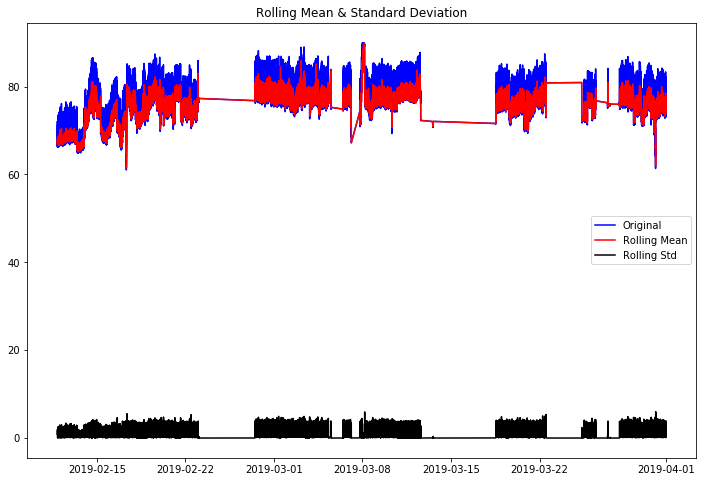

Results of Dickey-Fuller Test:
Test Statistic                -6.136141e+00
p-value                        8.178375e-08
#Lags Used                     6.200000e+01
Number of Observations Used    6.924000e+04
Critical Value (1%-------)    -3.430444e+00
Critical Value (5%-------)    -2.861582e+00
Critical Value (10%-------)   -2.566792e+00
dtype: float64
 => P-Value = 8.17837548883585e-08. Rejecting Null Hypothesis.
 => Series is Stationary.


In [89]:
test_stationarity(df.iloc[:,-1])

In [90]:
n_sample = df.shape[0]
print(n_sample)

69303


In [91]:
n_train=int(0.995*n_sample)+1
n_forecast=n_sample-n_train

ts_train = df.iloc[:n_train][target_column]
ts_test = df.iloc[n_train:][target_column]
print(ts_train.shape)
print(ts_test.shape)
print("Training Series:", "\n", ts_train.head(), "\n")
print("Testing Series:", "\n", ts_test.head())

(68957,)
(346,)
Training Series: 
 dateTime
2019-02-11 20:57:00    66.387058
2019-02-11 20:58:00    66.765225
2019-02-11 20:59:00    66.767387
2019-02-11 21:00:00    66.859457
2019-02-11 21:01:00    66.869962
Freq: T, Name: AEWIHO_T9AV2, dtype: float64 

Testing Series: 
 dateTime
2019-03-31 18:14:00    81.925250
2019-03-31 18:15:00    82.348834
2019-03-31 18:16:00    82.198988
2019-03-31 18:17:00    79.755119
2019-03-31 18:18:00    76.019798
Freq: T, Name: AEWIHO_T9AV2, dtype: float64


In [92]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa9920c55c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa9920000f0>)

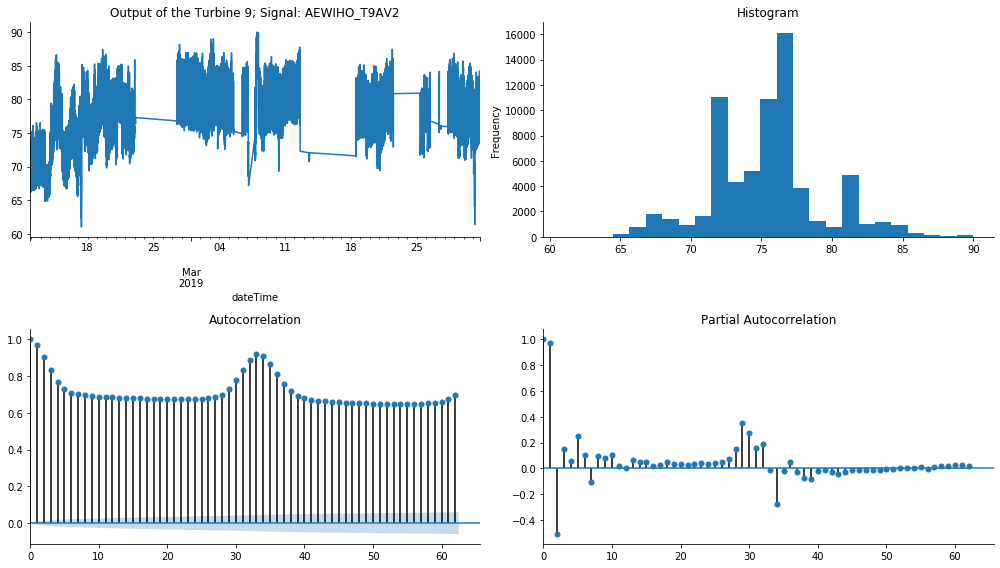

In [94]:
tsplot(ts_train, title='Output of the Turbine 9; Signal: '+str(target_column), lags=62)

In [95]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

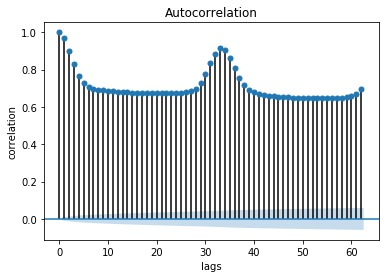

In [96]:
plot_acf(df.iloc[:,-1], lags=62)
plt.xlabel('lags')
plt.ylabel('correlation')
plt.savefig('acf plot code.png',bbox_inches='tight')
pyplot.show()

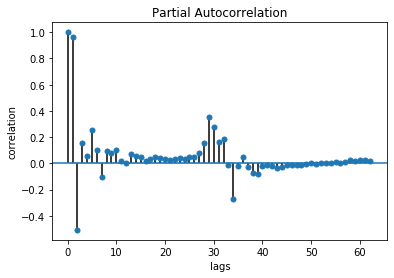

In [97]:
plot_pacf(df.iloc[:,-1], lags=62)
plt.xlabel('lags')
plt.ylabel('correlation')
plt.savefig('pacf plot code.png',bbox_inches='tight')
pyplot.show()

In [80]:
df_log = np.log(df)

df_log_diff = df_log - df_log.shift()
df_log_diff.dropna(inplace=True)

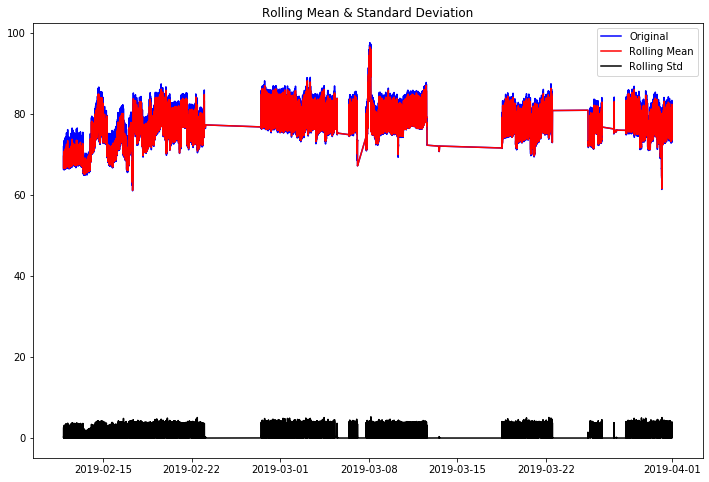

Results of Dickey-Fuller Test:
Test Statistic                -6.153869e+00
p-value                        7.449446e-08
#Lags Used                     6.200000e+01
Number of Observations Used    6.924000e+04
Critical Value (1%)           -3.430444e+00
Critical Value (5%)           -2.861582e+00
Critical Value (10%)          -2.566792e+00
dtype: float64
 => P-Value = 7.449445744014048e-08. Rejecting Null Hypothesis.
 => Series is Stationary.


In [117]:
test_stationarity(df.iloc[:,-1])

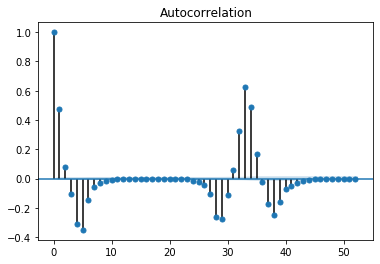

In [83]:
plot_acf(df_log_diff.iloc[:,-1], lags=52)
pyplot.show()

# plt.figure()

# plot_pacf(df_log_diff.iloc[:,-1], lags=52)
# pyplot.show()

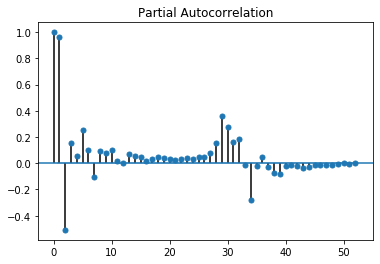

In [84]:
plot_pacf(df.iloc[:,-1], lags=52)
pyplot.show()

In [98]:
def make_dataset(PandaDataframe, test_set_number):
    dataset = np.array(PandaDataframe)
    
    go_for_training = int(len(dataset)-required_number_of_test_data)
    print(go_for_training)
    
    train_data = dataset[0:go_for_training]
    test_data = dataset[go_for_training:]

#     NumberOfElements = int(len(dataset)*0.9999)
#     print('dataset length: ',len(dataset))
#     print('Number of Elements for training: ',NumberOfElements)

#     train_data = dataset[0:NumberOfElements]
#     test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_set, test_set = make_dataset(df, test_set_number = 200)
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

69103
train_set shape:  (69103, 1)
test_set shape:  (200, 1)


In [99]:
Actual = [x for x in train_set]
Predictions_ARIMA = list()

In [100]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
#     print('from function screaming')
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [101]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [102]:
count_1=1
for timepoint in range(len(test_set)):
#     print('I am in for loop')
    ActualValue =  test_set[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 2,0,0)
    print('count=%d, Actual=%f, Predicted=%f' % (count_1 ,ActualValue, Prediction))
    count_1+=1
    #add it in the list
    Predictions_ARIMA.append(Prediction)
    Actual.append(ActualValue)

count=1, Actual=73.780151, Predicted=74.161341
count=2, Actual=74.426803, Predicted=73.604155
count=3, Actual=74.112900, Predicted=74.804182
count=4, Actual=74.388801, Predicted=74.017602
count=5, Actual=74.094980, Predicted=74.579605
count=6, Actual=74.336587, Predicted=74.010779
count=7, Actual=74.086329, Predicted=74.512548
count=8, Actual=73.592612, Predicted=74.024700
count=9, Actual=73.893230, Predicted=73.431739
count=10, Actual=73.976340, Predicted=74.121191
count=11, Actual=73.853065, Predicted=74.089616
count=12, Actual=73.543488, Predicted=73.867555
count=13, Actual=73.490656, Predicted=73.478647
count=14, Actual=73.831129, Predicted=73.558938
count=15, Actual=73.922272, Predicted=74.082424
count=16, Actual=73.783549, Predicted=74.042309
count=17, Actual=73.647607, Predicted=73.793631
count=18, Actual=73.888286, Predicted=73.665849
count=19, Actual=73.918255, Predicted=74.086014
count=20, Actual=78.728446, Predicted=74.007391
count=21, Actual=81.269947, Predicted=81.008553
c

count=171, Actual=74.069337, Predicted=73.923537
count=172, Actual=73.980356, Predicted=74.229164
count=173, Actual=74.017431, Predicted=74.006149
count=174, Actual=74.122169, Predicted=74.105428
count=175, Actual=74.076752, Predicted=74.239331
count=176, Actual=74.156772, Predicted=74.119878
count=177, Actual=74.057905, Predicted=74.259651
count=178, Actual=74.192921, Predicted=74.074809
count=179, Actual=74.029790, Predicted=74.321941
count=180, Actual=73.550285, Predicted=74.015438
count=181, Actual=74.121551, Predicted=73.399045
count=182, Actual=73.522169, Predicted=74.475783
count=183, Actual=73.043282, Predicted=73.311424
count=184, Actual=73.649152, Predicted=72.917593
count=185, Actual=73.590140, Predicted=74.044469
count=186, Actual=75.866245, Predicted=73.650569
count=187, Actual=80.643686, Predicted=76.999829
count=188, Actual=81.903005, Predicted=82.810929
count=189, Actual=82.268195, Predicted=82.219507
count=190, Actual=81.664797, Predicted=82.112169
count=191, Actual=78

In [103]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_set, Predictions_ARIMA)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

print("size of prediction: ",len(Predictions_ARIMA))
print("size of actual: ",len(Actual))

Test Mean Squared Error (smaller the better fit): 1.219
size of prediction:  200
size of actual:  69303


In [104]:
print(type(Predictions_ARIMA))
predictions_array = np.array(Predictions_ARIMA)
print(type(predictions_array))
print(predictions_array.shape)
print(type(test_set))
print(test_set.shape)

<class 'list'>
<class 'numpy.ndarray'>
(200, 1)
<class 'numpy.ndarray'>
(200, 1)


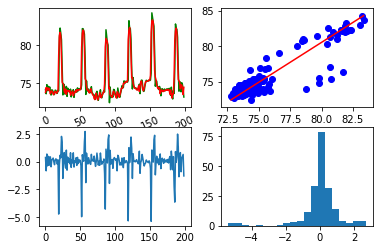

In [105]:
plt.subplot(2,2,1)
plt.plot(Predictions_ARIMA,color='green')
plt.plot(test_set,color='red')
plt.xticks( rotation=25)

plt.subplot(2,2,2)
plt.plot((min(test_set), max(test_set)), (min(Predictions_ARIMA), max(Predictions_ARIMA)), color='red')
plt.scatter(test_set, Predictions_ARIMA, color='blue')


plt.subplot(2,2,3)
difference_of_value = Predictions_ARIMA - test_set
# print(type(difference_of_value))
plt.plot(difference_of_value[:])

plt.subplot(2,2,4)
plt.hist(difference_of_value, bins=20)
plt.rcParams['figure.figsize'] =(12,5)
plt.show()

In [106]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_set, Predictions_ARIMA))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_set, Predictions_ARIMA))
print("Mean squared error: %.2f" % mean_squared_error(test_set, Predictions_ARIMA))
RMSE=math.sqrt(mean_squared_error(test_set, Predictions_ARIMA))
print('RMSE: ',RMSE)

r_2 statistic: 0.81
Mean_absolute_error: 0.62
Mean squared error: 1.22
RMSE:  1.104092394985222


In [140]:
def plot_graph(test_output, predicted_output, final_directory,subfolder):
    fig_location = final_directory + '/' + str(subfolder)

    if not os.path.exists(fig_location):
        os.makedirs(fig_location)
    else:
        shutil.rmtree(fig_location, ignore_errors=True)
        os.makedirs(fig_location)

    plt.plot((min(test_output), max(test_output)), (min(predicted_output), max(predicted_output)), color='red')
    plt.scatter(test_output, predicted_output, color='blue')
    # plt.savefig(model+'_'+'figure_actual_vs_predicted_with_best_fit_line.jpg')
    plt.xlabel('Actual output')
    plt.ylabel('Predicted output')
#     plt.title('scatter plotting of predicted_output alongside with the average line of test and predicted output')
    plt.rcParams['figure.figsize'] =(12,5)
    plt.savefig(fig_location + '/' + "scatter_test_pred" + '.jpg')
    plt.show()


    difference_of_value = predicted_output - test_output
    print(type(difference_of_value))
    plt.plot(difference_of_value[:])
#     plt.title('observation of the difference of actual and predicted value')

    # plt.rcParams['xtick.labelsize']=2
    # plt.rcParams['ytick.labelsize']=2
    # plt.tick_params(labelsize=20)
    plt.ylabel('Difference between actual and predicted output')
    plt.xlabel('Sample number')
    plt.grid(b=None, which='both', axis='both')
    plt.rcParams['figure.figsize'] =(12,5)
    plt.savefig(fig_location + '/' + "difference_test_pred" + '.jpg')
    plt.show()

    plt.hist(difference_of_value, bins=20)
    # plt.xlim(-10,10,1)
    # plt.savefig(model+'_'+'histogram_of_difference_value.jpg')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
#     plt.title('histogram of value of difference')
    plt.rcParams['figure.figsize'] =(12,5)
    plt.savefig(fig_location + '/' + "error_histogram" + '.jpg')
    plt.show()

    plt.plot(predicted_output[0:len(predicted_output[0:])], color='blue')
    plt.plot(test_output[0:], color='red')
#     plt.xlim(0,40,1)
#     plt.ylim(50,70,1)
#     plt.savefig(model+'_'+'figure_difference_between_actual_and_predicted_value.jpg')
    plt.xlabel('Sample number')
    plt.ylabel('Actual and Predicted output')
#     plt.title('Visualization of test and predicted output in the same timestamp')
    plt.legend(['predicted_output','actual_output'], loc='best')
    plt.rcParams['figure.figsize'] =(12,5)
    plt.savefig(fig_location + '/' + "test_and_pred" + '.jpg')
    plt.show()

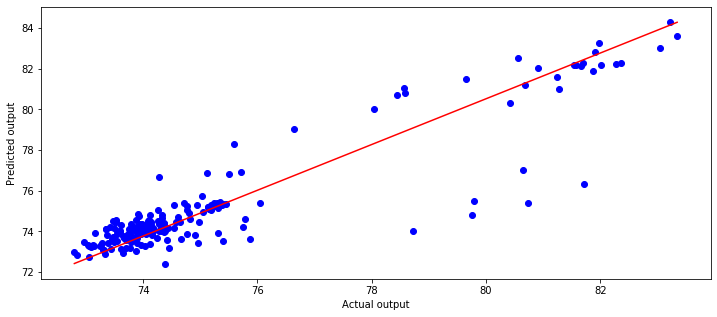

<class 'numpy.ndarray'>


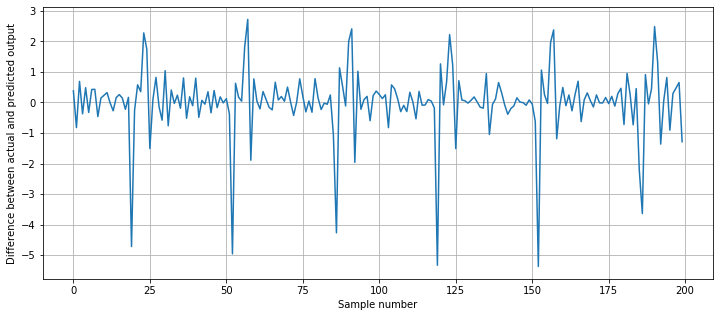

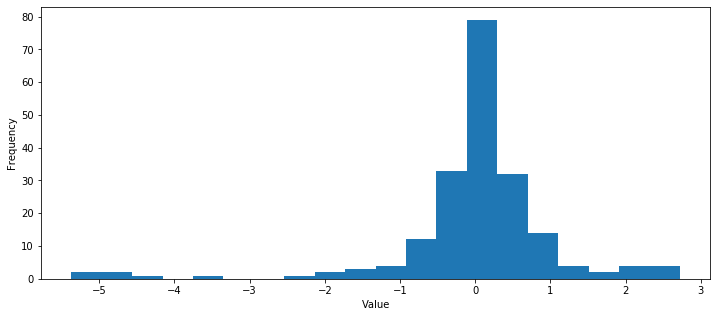

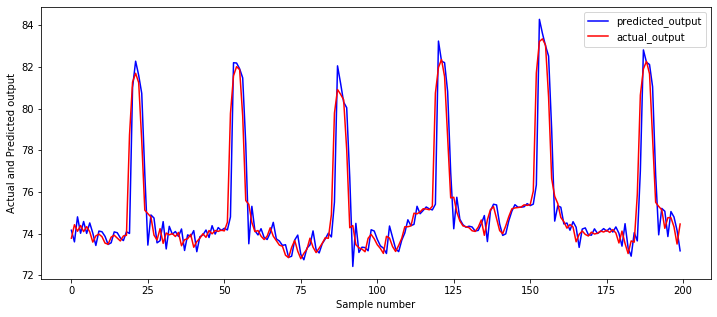

In [141]:
plot_graph(test_set, Predictions_ARIMA, final_directory, 'ARIMA_200')

In [142]:
evaluation_metrices(test_set, Predictions_ARIMA,final_directory,'ARIMA_200', evaluation_metrics_file_path)

r_2 statistic: 0.81
Mean_absolute_error: 0.62
Mean squared error: 1.22
RMSE:  1.10427720852957
!!!!---------------!!!!----------------!!!!


# auto arima

In [54]:
from pmdarima.arima import auto_arima

In [66]:
#divide into train and validation set
train = df[:int(0.9999*(len(df)))]
test = df[int(0.9999*(len(df))):]
print(train.shape)
print(test.shape)

(69296, 1)
(7, 1)


In [ ]:
#training model
model_auto_arima = auto_arima(train, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
#fitting model
model_auto_arima.fit(train)

In [ ]:
#predicting values and evaluating model
y_pred_auto_arima = model_auto_arima.predict(n_periods=len(valid))
from sklearn.metrics import r2_score
acc = r2_score(valid.values, y_pred_auto_arima)
print(acc)